In [45]:
#第三类DDOS木马恶意软件EDA
#特点：在数据中得到体现，设置定时器，加载dll入侵，多进程，api在不同的tid上调用系列一致，调用数量大于挖矿病毒
import pandas as pd
data_df3=pd.read_csv('label3.csv')

In [46]:
data_df3.head()

,file_id,label,api,tid,return_value,index
0,43,3,GetSystemTimeAsFileTime,1064,0,292
1,43,3,GetSystemTimeAsFileTime,1064,0,293
2,43,3,GetSystemTimeAsFileTime,1064,0,294
3,43,3,GetSystemTimeAsFileTime,1064,0,298
4,43,3,__exception__,1064,0,299


In [47]:
api=data_df3['api'].value_counts()

In [48]:
api

RegOpenKeyExW                     679410
LdrGetProcedureAddress            563653
RegQueryValueExW                  547684
NtClose                           516040
RegCloseKey                       447524
GetForegroundWindow               375988
NtDelayExecution                  364467
GetSystemMetrics                  312785
GetKeyState                       297381
LdrLoadDll                        156941
NtQueryValueKey                    95761
NtQueryKey                         88704
NtAllocateVirtualMemory            88343
NtOpenMutant                       80093
NtOpenKeyEx                        69262
GetCursorPos                       56332
GetSystemTimeAsFileTime            53966
LoadStringW                        52843
NtWriteFile                        51447
NtReadFile                         48285
SetErrorMode                       44707
LdrGetDllHandle                    41410
NtMapViewOfSection                 36334
NtFreeVirtualMemory                35642
NtOpenKey       

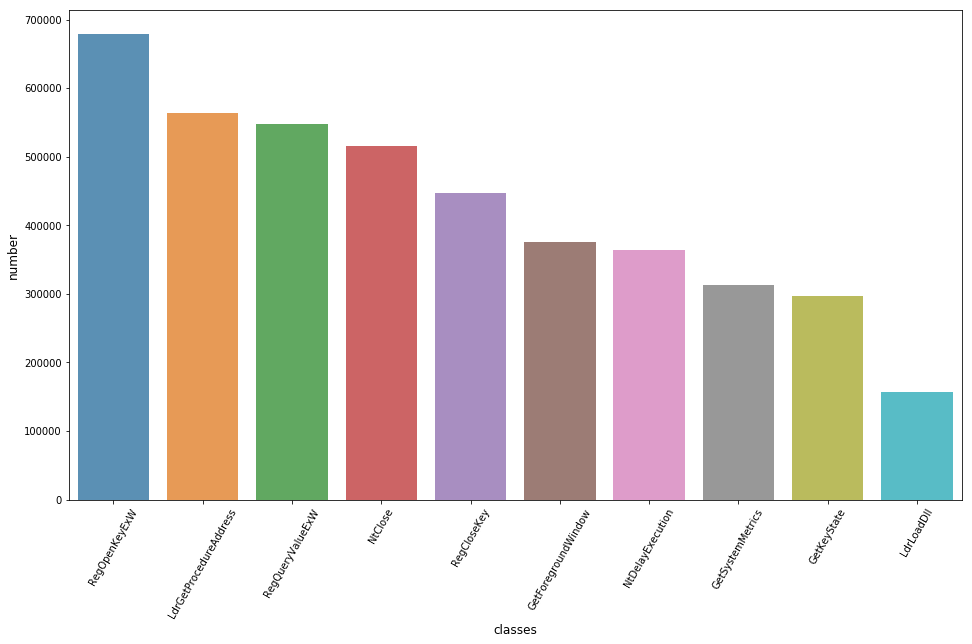

In [49]:
#所有文件中top api调用数量
#柱状图
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(16,9))
sns.barplot(api.index[0:10],api.values[0:10],alpha=0.8)
plt.xticks(rotation=60)
plt.xlabel("classes",fontsize = 12)
plt.ylabel("number",fontsize=12)
plt.show()

In [50]:
every_file3=data_df3.groupby('file_id')['api'].count().sort_values(ascending=False)

In [51]:
every_file3

file_id
53896     212378
94776      60227
12154      51511
19009      45869
12156      40348
108980     40348
21147      40348
108215     40224
86200      40224
72452      40224
80383      40224
31262      37696
53781      36208
39393      35429
76531      34572
68293      32311
102210     31776
69372      31637
63950      30261
40817      30261
68489      30261
36236      30168
100872     29999
58402      28705
63616      26323
67270      26002
76590      25932
25645      25467
4490       25163
32331      25005
           ...  
36975        256
84953        244
99468        244
111467       240
99118        239
29092        237
39214        237
47497        237
42613        237
2678         237
23609        234
16216        234
102739       200
81044        195
26870        195
55854        192
22052        192
109921       179
113743       165
13776        135
28073        135
53738        132
82589         99
106773        99
56463         99
91975         90
46623         90
9895  

In [52]:
import numpy
index=[]
for i in range(len(every_file3)):
    index.append(i)
index=numpy.array(index)

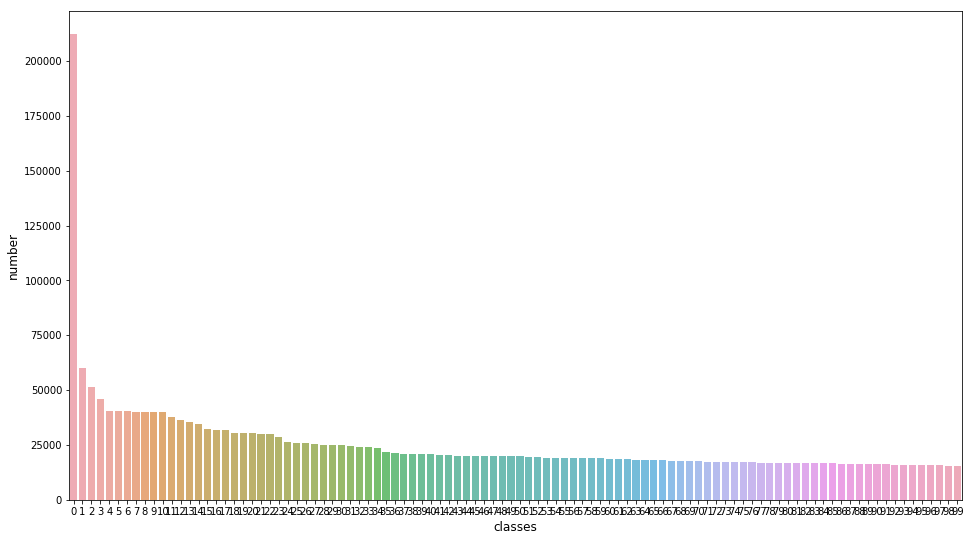

In [53]:
#每个文件调用api数量分布图，每个文件之间对比
#柱状图
import matplotlib.pyplot as plt
import seaborn as sns
import numpy

plt.figure(figsize=(16,9))
sns.barplot(index[0:100],every_file3.values[0:100],alpha=0.8)
plt.xlabel("classes",fontsize = 12)
plt.ylabel("number",fontsize=12)
plt.show()

/home/admin/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


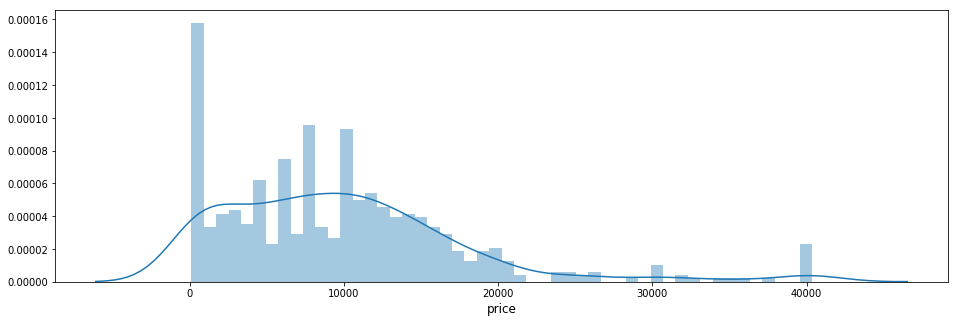

In [54]:

#文件调用api数量分布直方图
ulimit_start = numpy.percentile(every_file3.values,1)
ulimit_end = numpy.percentile(every_file3.values,99)
every_file3.loc[[every_file3.iloc[i]<ulimit_start for i in range(len(every_file3))]]=ulimit_start
every_file3.loc[[every_file3.iloc[i]>ulimit_end for i in range(len(every_file3))]]=ulimit_end
plt.figure(figsize=(16,5))
sns.distplot(every_file3.values,bins=50,kde=True)
plt.xlabel('price',fontsize=12)
plt.show()

In [55]:
every_file3

file_id
53896     40348.0
94776     40348.0
12154     40348.0
19009     40348.0
12156     40348.0
108980    40348.0
21147     40348.0
108215    40224.0
86200     40224.0
72452     40224.0
80383     40224.0
31262     37696.0
53781     36208.0
39393     35429.0
76531     34572.0
68293     32311.0
102210    31776.0
69372     31637.0
63950     30261.0
40817     30261.0
68489     30261.0
36236     30168.0
100872    29999.0
58402     28705.0
63616     26323.0
67270     26002.0
76590     25932.0
25645     25467.0
4490      25163.0
32331     25005.0
           ...   
36975       256.0
84953       244.0
99468       244.0
111467      240.0
99118       239.0
29092       237.0
39214       237.0
47497       237.0
42613       237.0
2678        237.0
23609       234.0
16216       234.0
102739      200.0
81044       195.0
26870       195.0
55854       192.0
22052       192.0
109921      179.0
113743      165.0
13776       135.0
28073       135.0
53738       132.0
82589        99.0
106773       99.0
56

In [56]:
#第一个文件散点图
file_1=data_df3[data_df3['file_id']==108214]

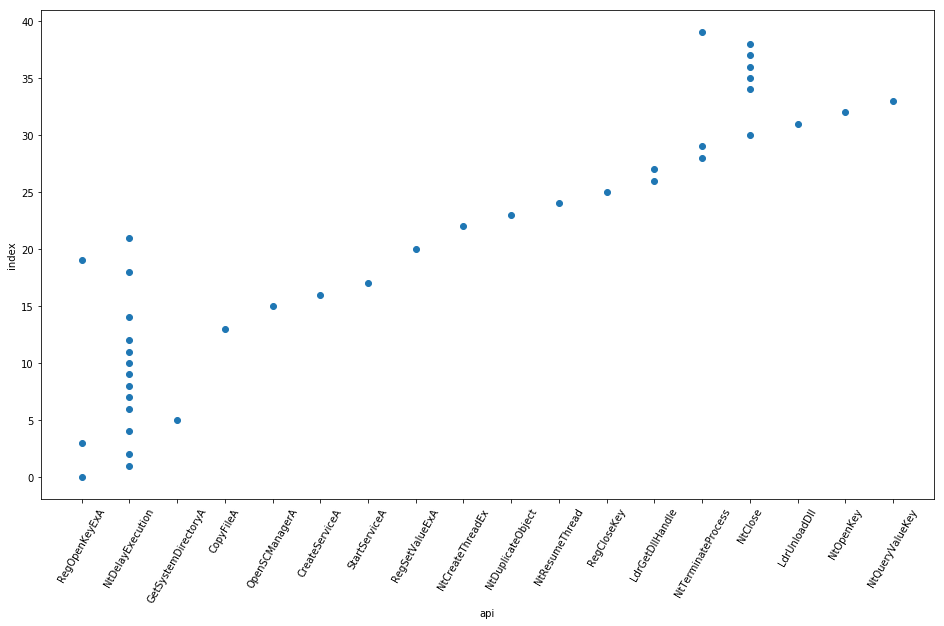

In [57]:
plt.figure(figsize=(16,9))
plt.scatter((file_1['api'].values),file_1['index'])
plt.xticks(rotation=60)
plt.yticks(rotation=360)
plt.xlabel('api',fontsize=10)
plt.ylabel('index',fontsize=10)
plt.show()

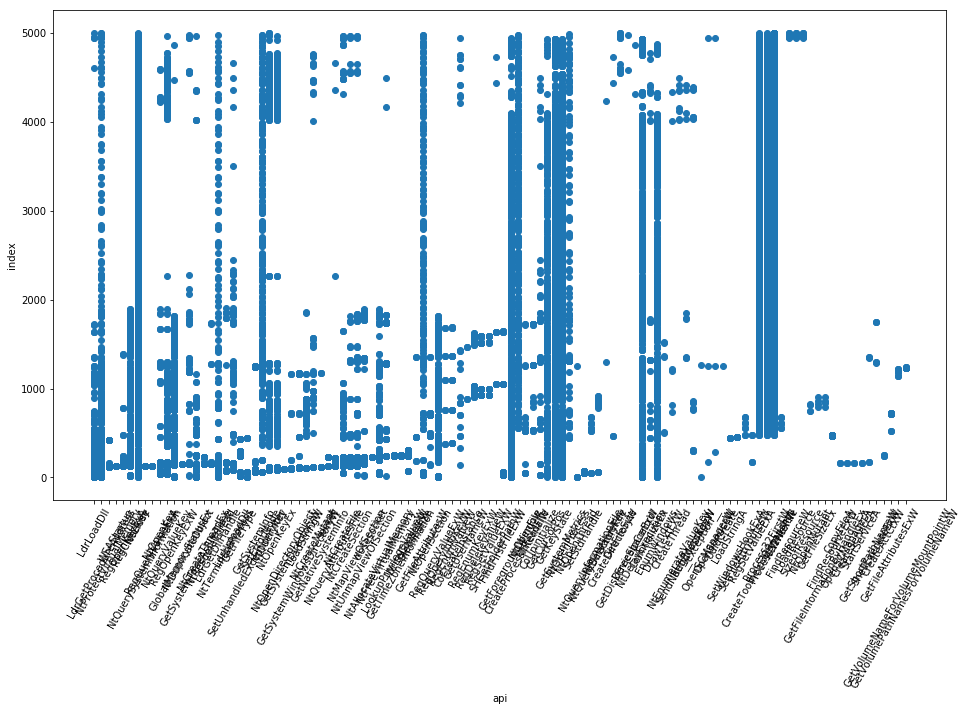

In [58]:
#第%99个文件散点图
file_4=data_df3[data_df3['file_id']==53896]
plt.figure(figsize=(16,9))
plt.scatter((file_4['api'].values),file_4['index'])
plt.xticks(rotation=60)
plt.yticks(rotation=360)
plt.xlabel('api',fontsize=10)
plt.ylabel('index',fontsize=10)
plt.show()

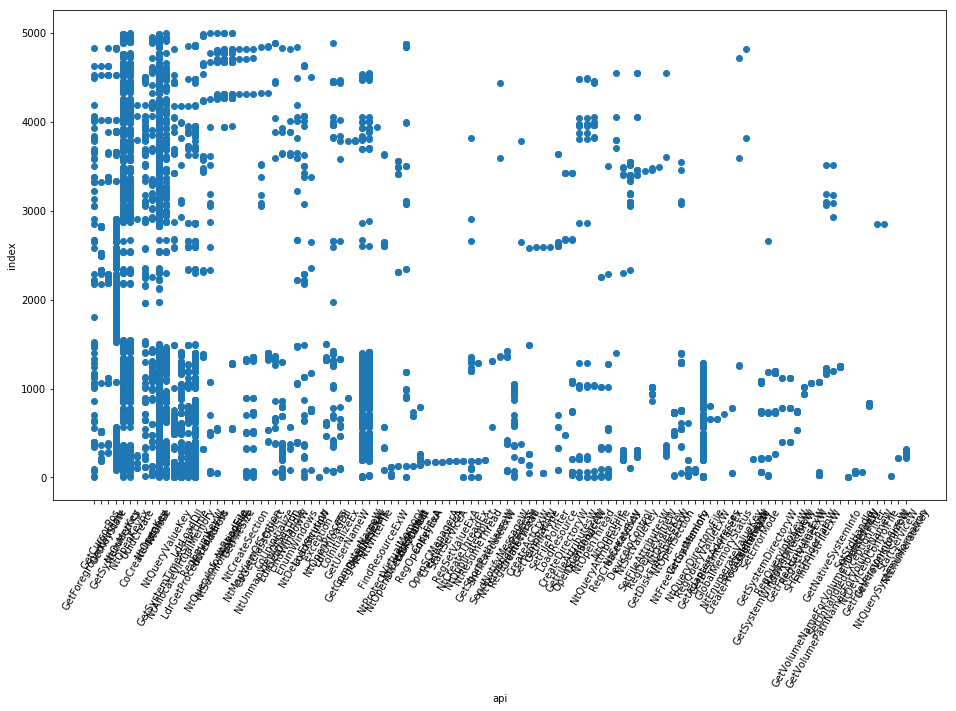

In [59]:
#第%50个文件散点图
file_2=data_df3[data_df3['file_id']==66040]
#print(file_2)
plt.figure(figsize=(16,9))
plt.scatter((file_2['api'].values),file_2['index'])
plt.xticks(rotation=60)
plt.yticks(rotation=360)
plt.xlabel('api',fontsize=10)
plt.ylabel('index',fontsize=10)
plt.show()

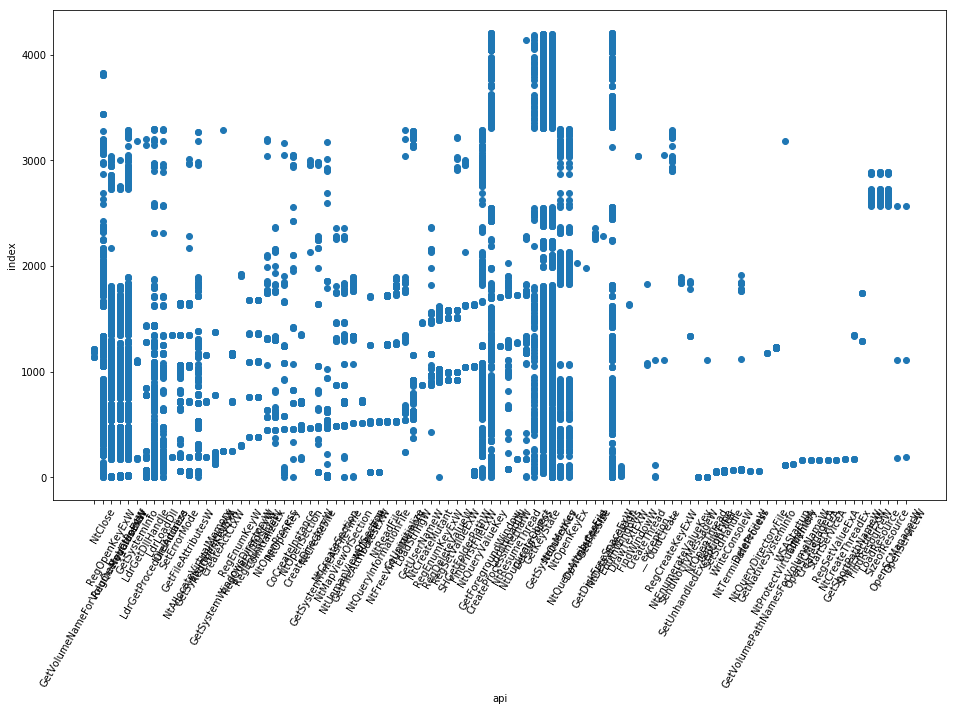

In [60]:
#第25%个文件散点图
file_3=data_df3[data_df3['file_id']==66389 ]
plt.figure(figsize=(16,9))
plt.scatter((file_3['api'].values),file_3['index'])
plt.xticks(rotation=60)
plt.yticks(rotation=360)
plt.xlabel('api',fontsize=10)
plt.ylabel('index',fontsize=10)
plt.show()

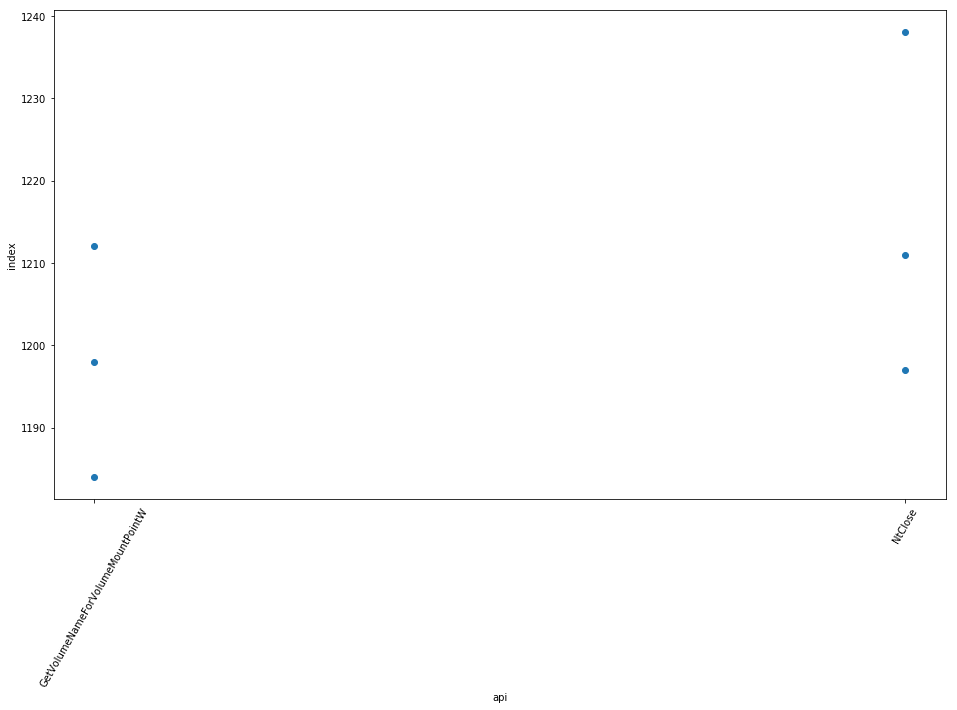

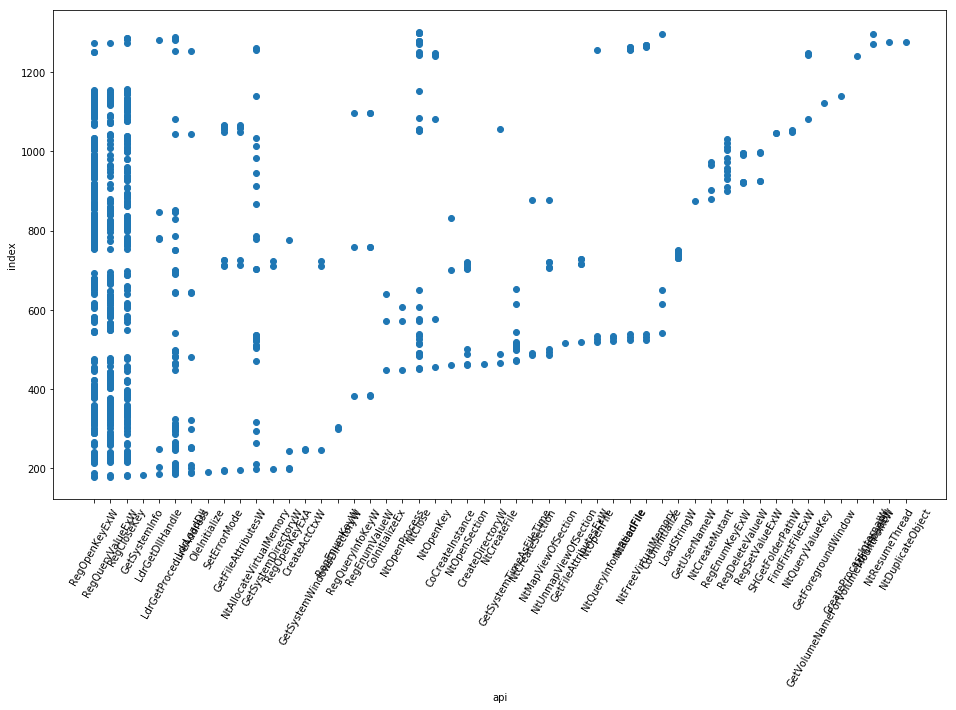

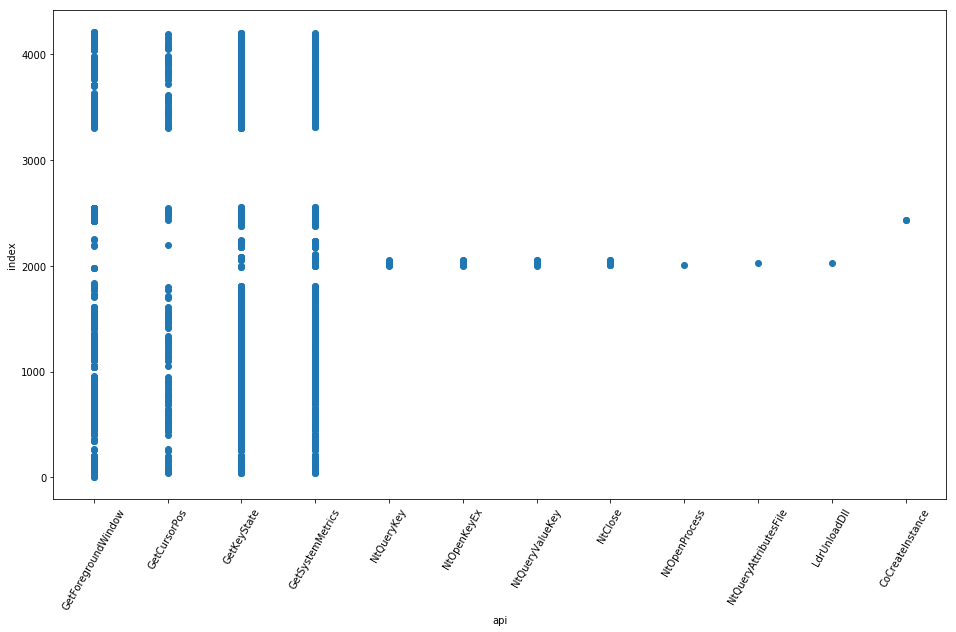

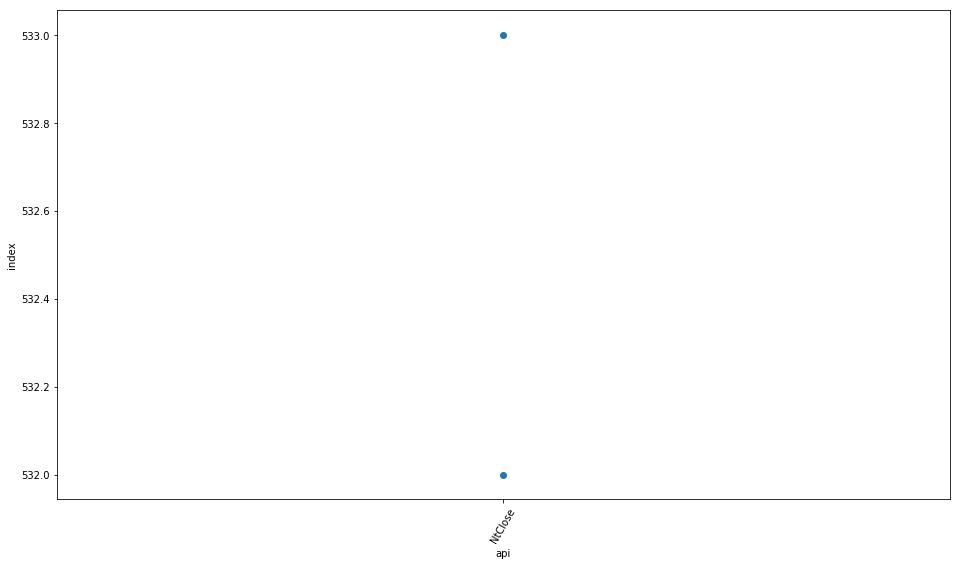

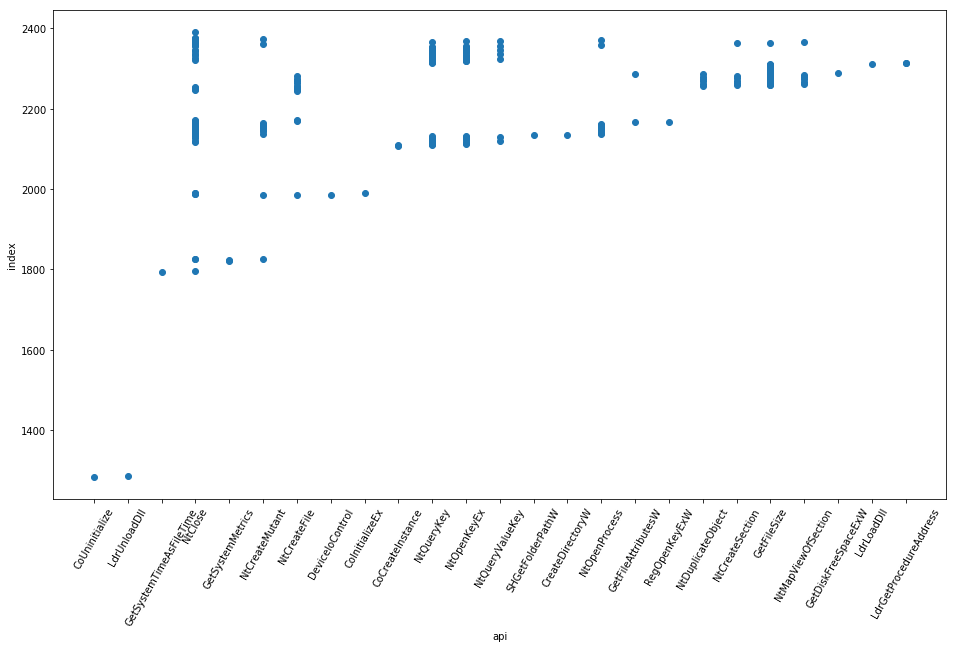

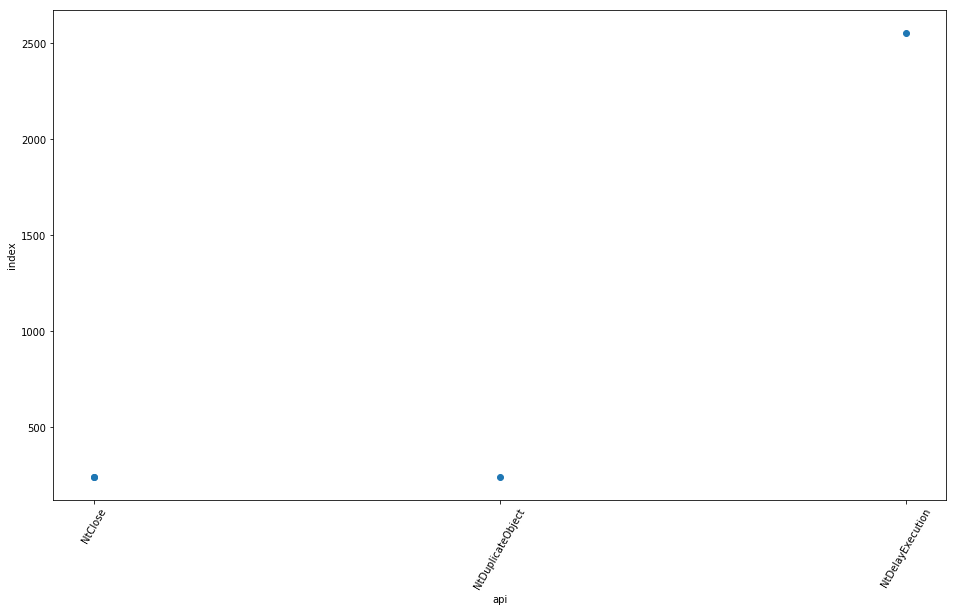

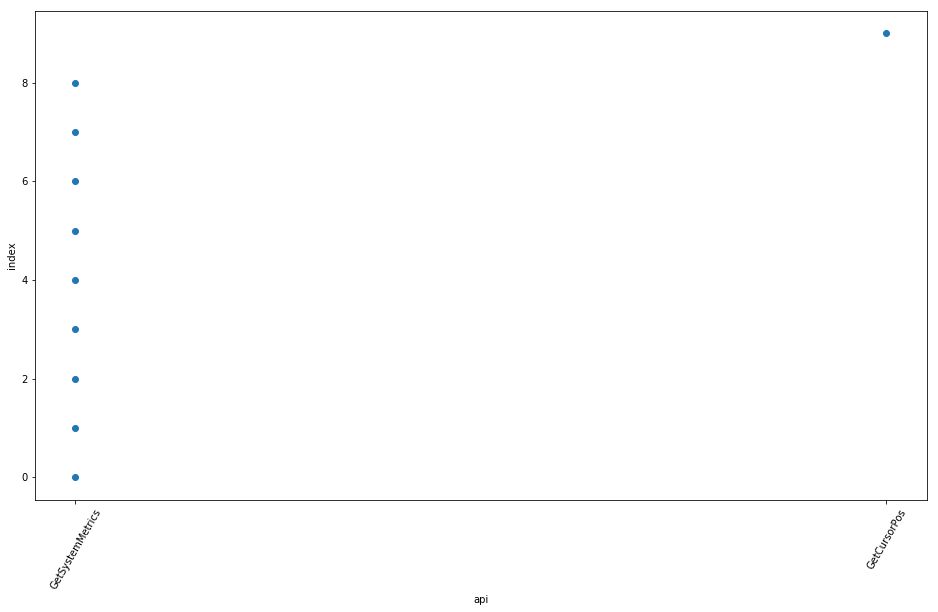

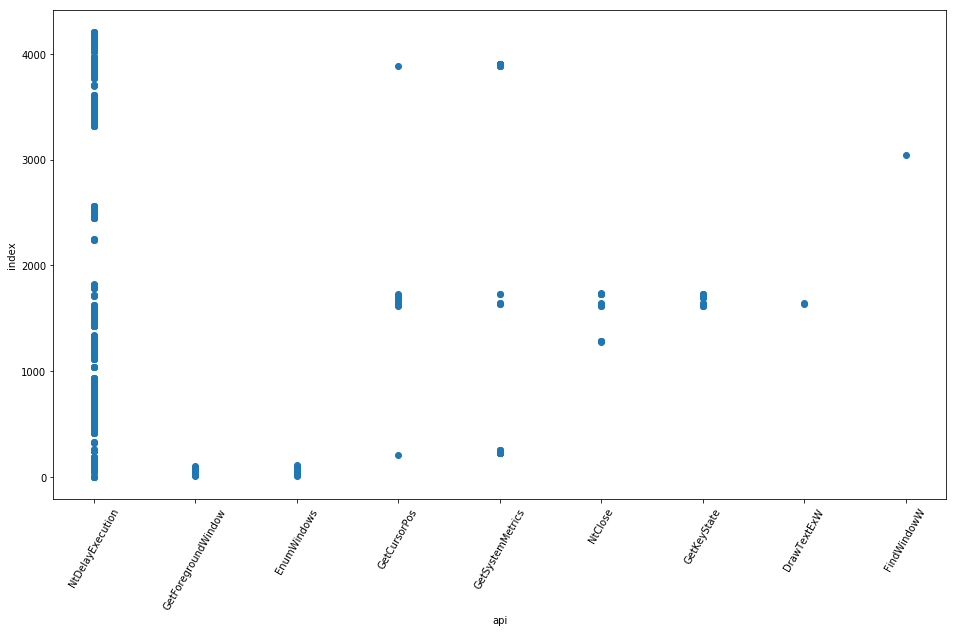

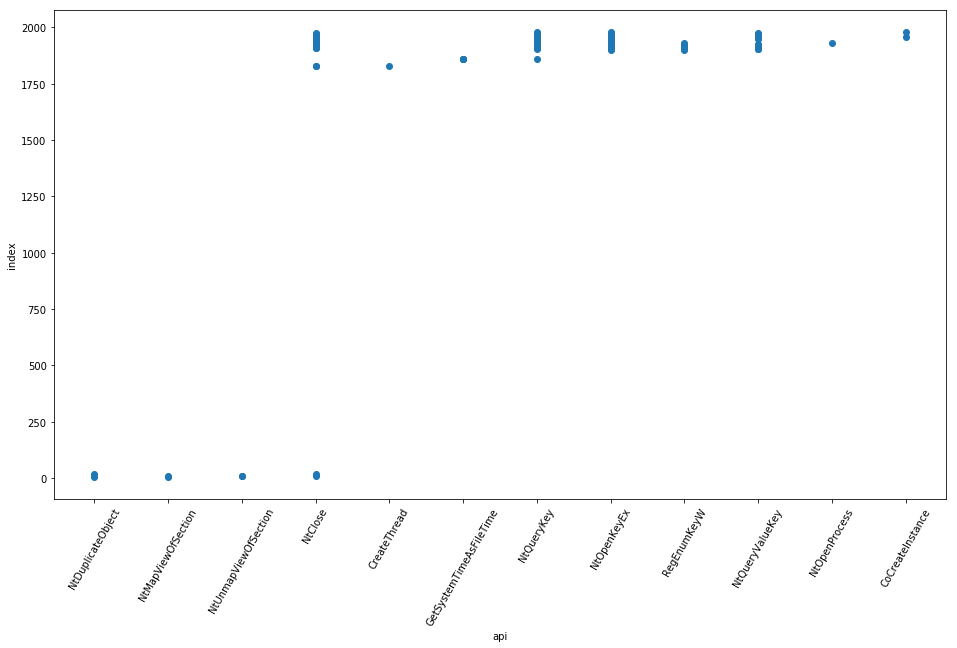

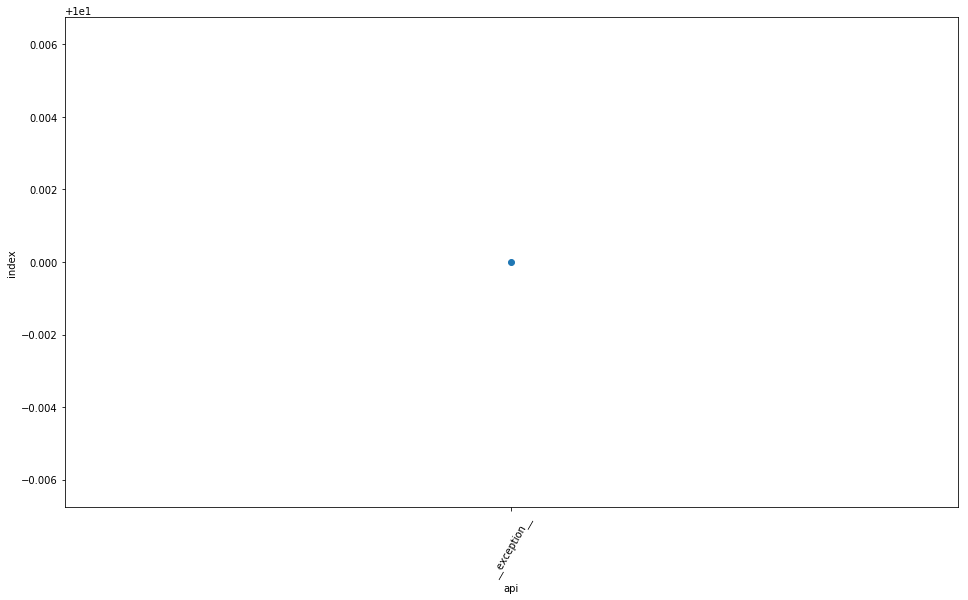

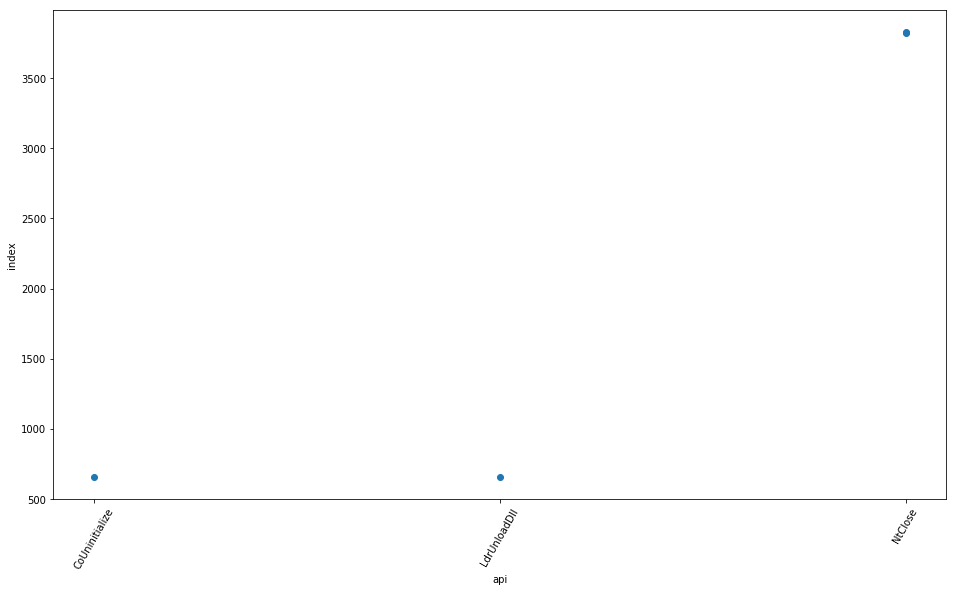

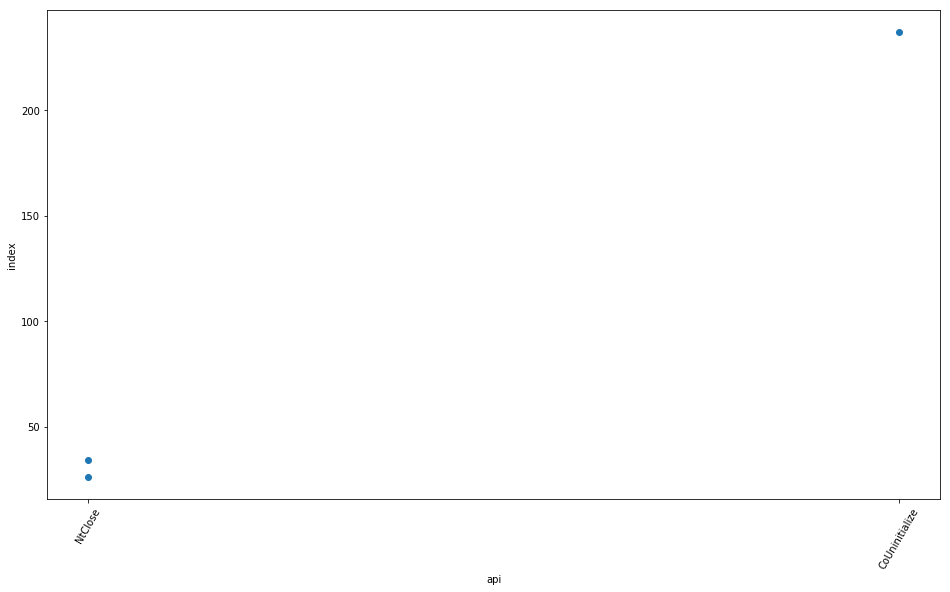

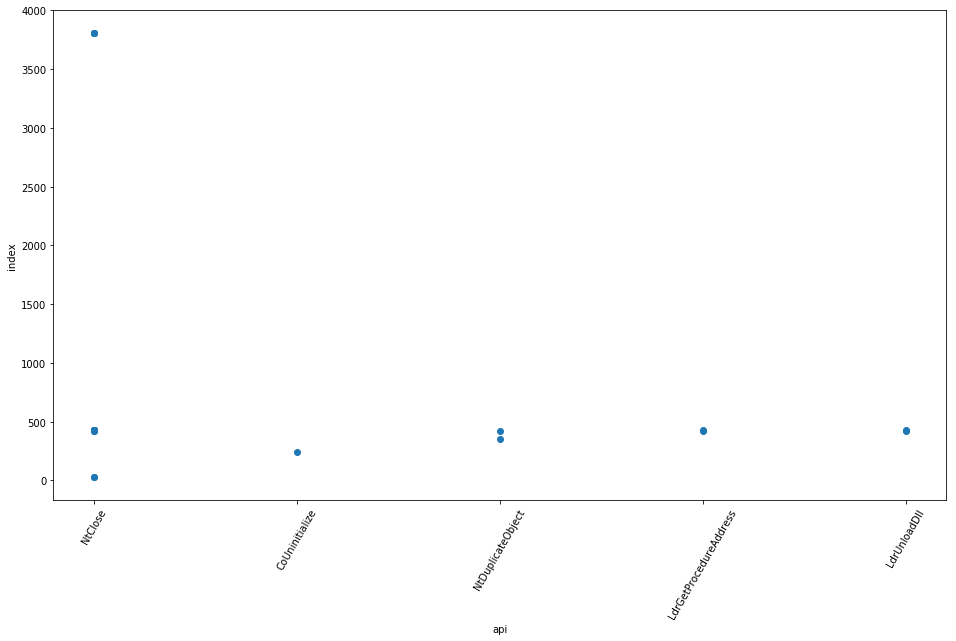

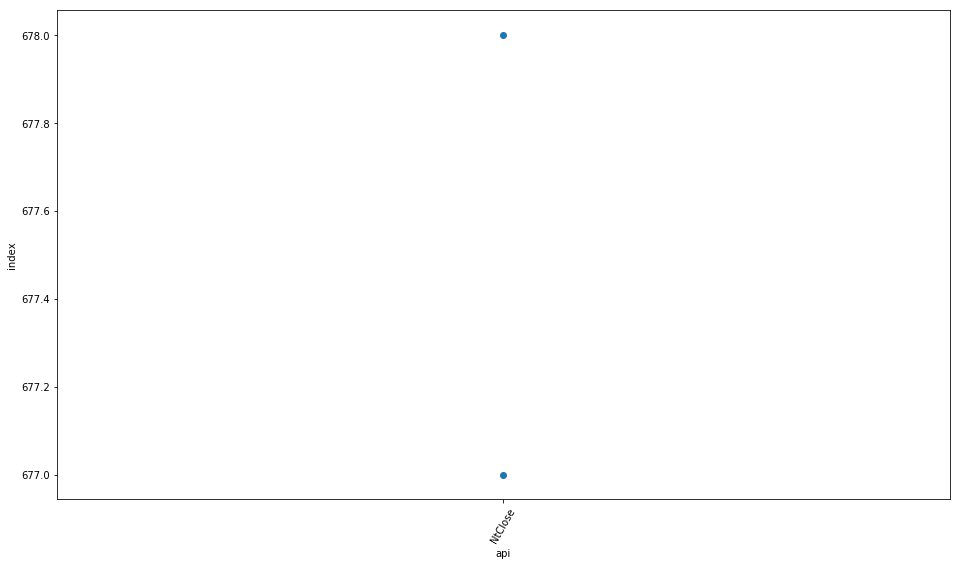

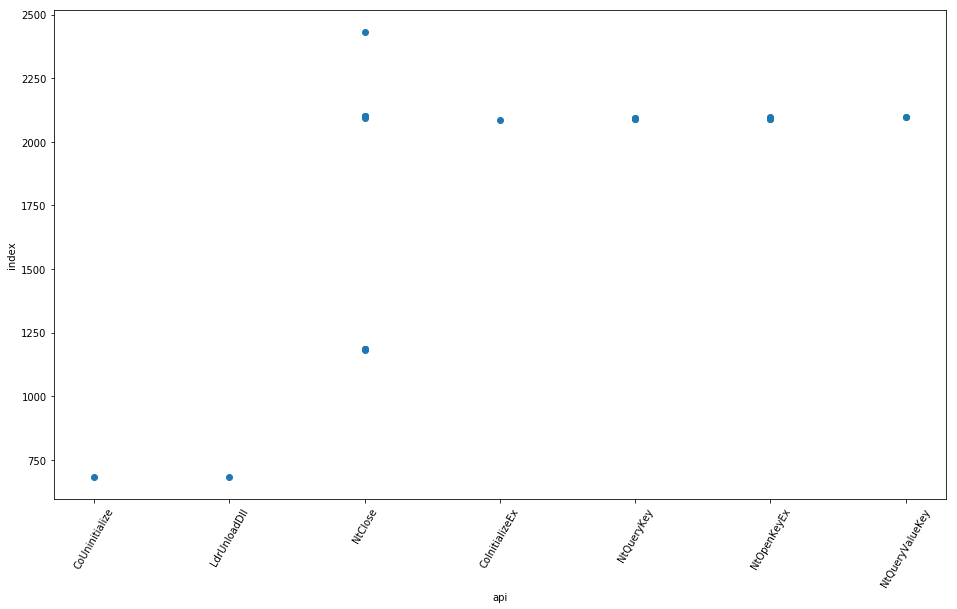

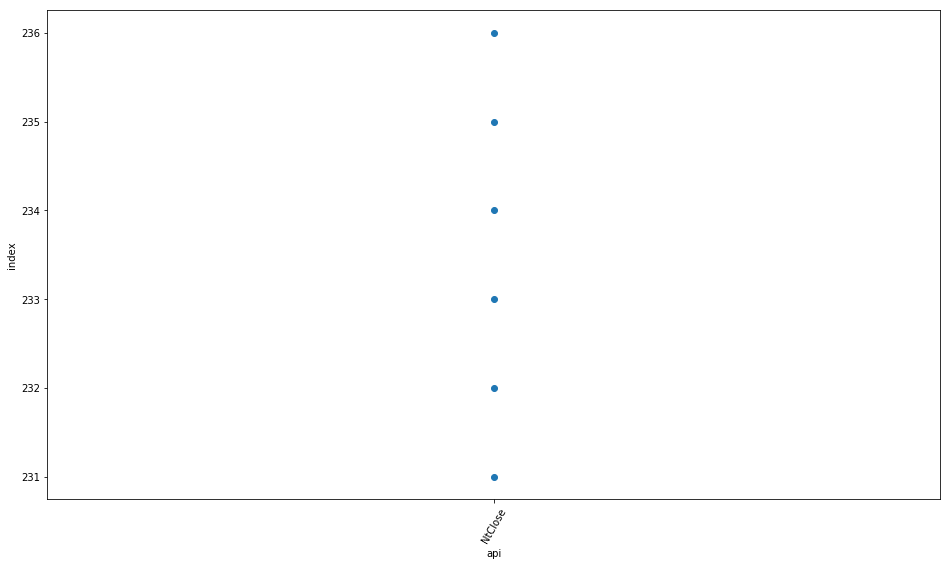

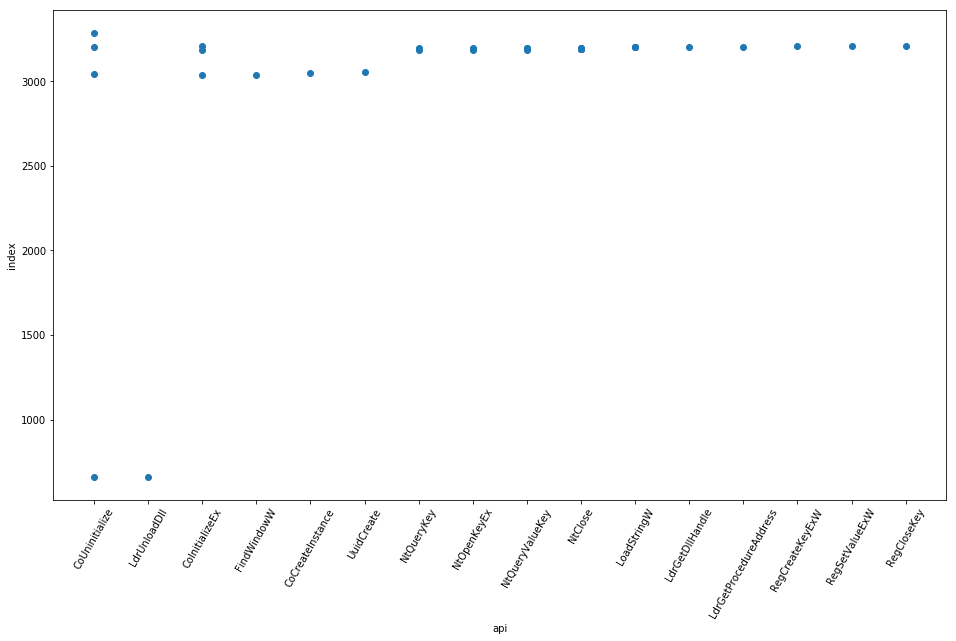

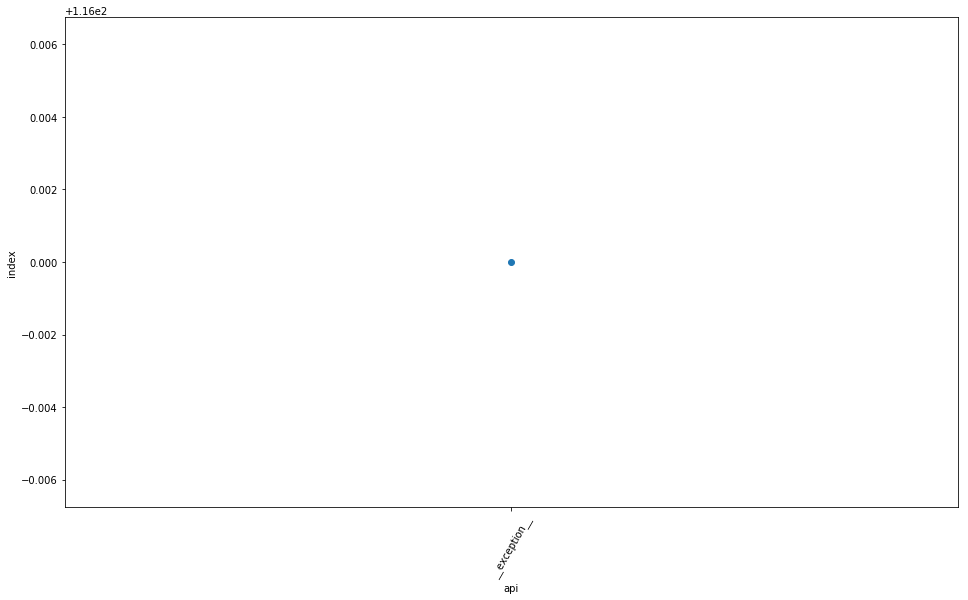

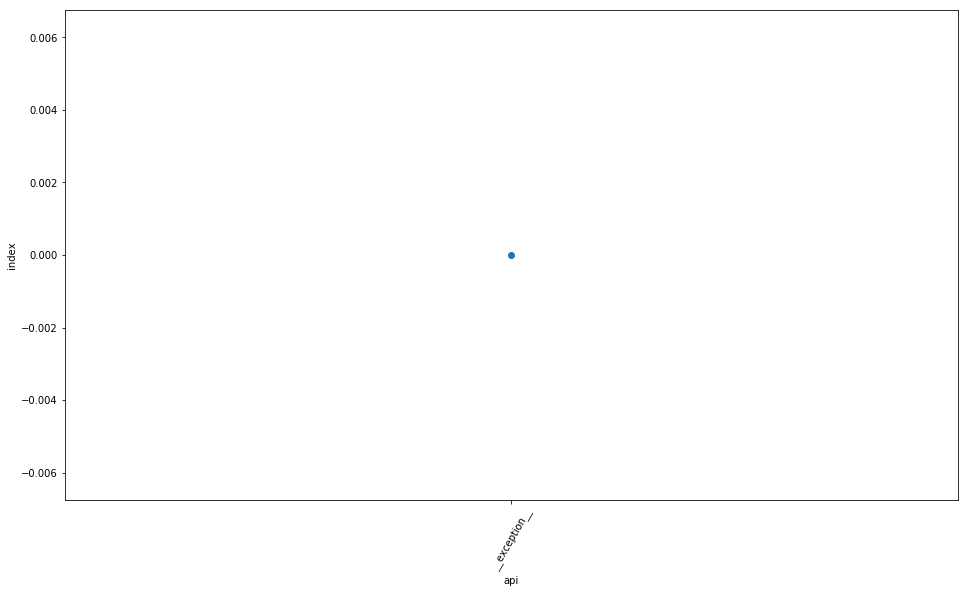

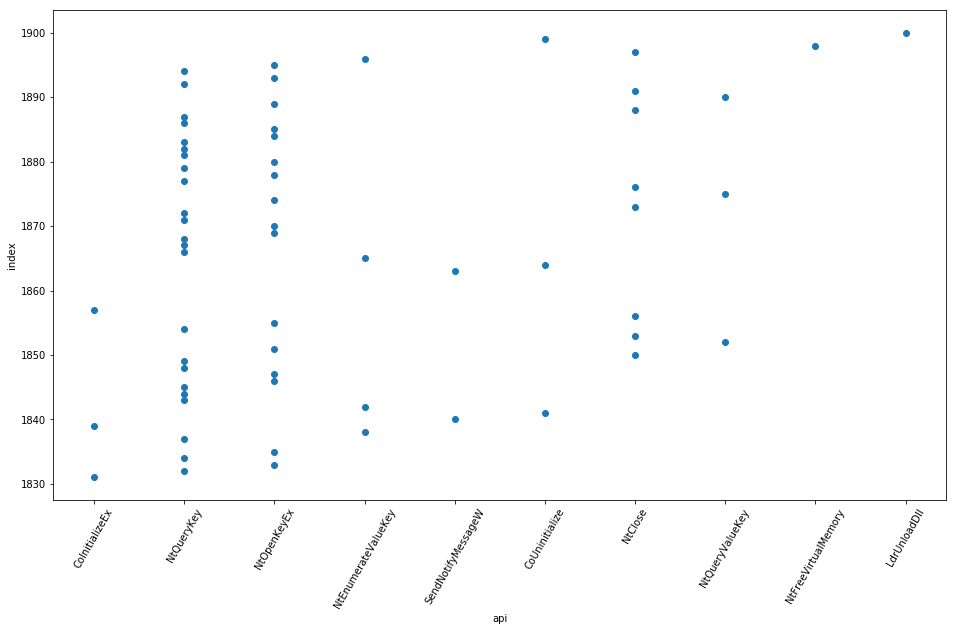

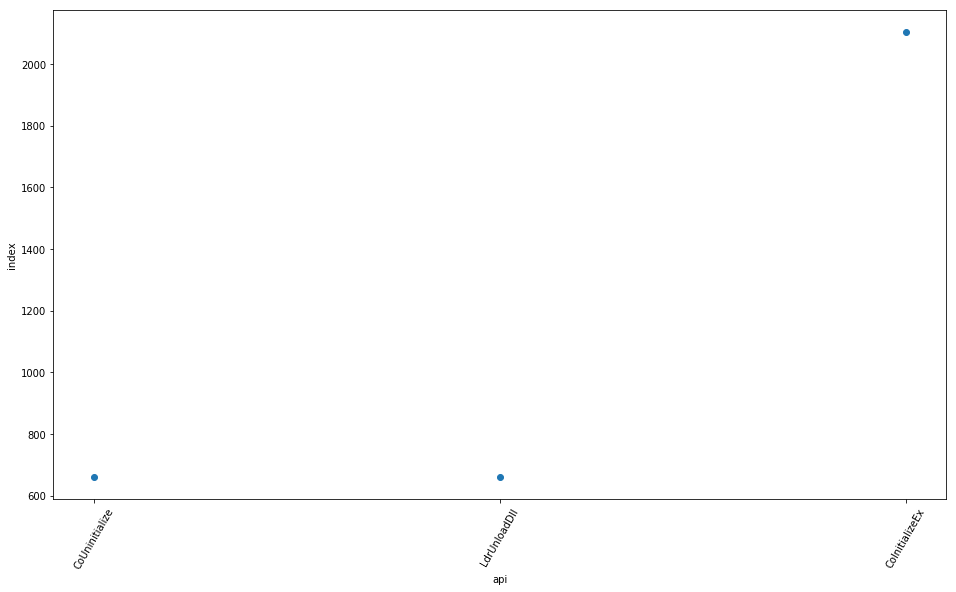

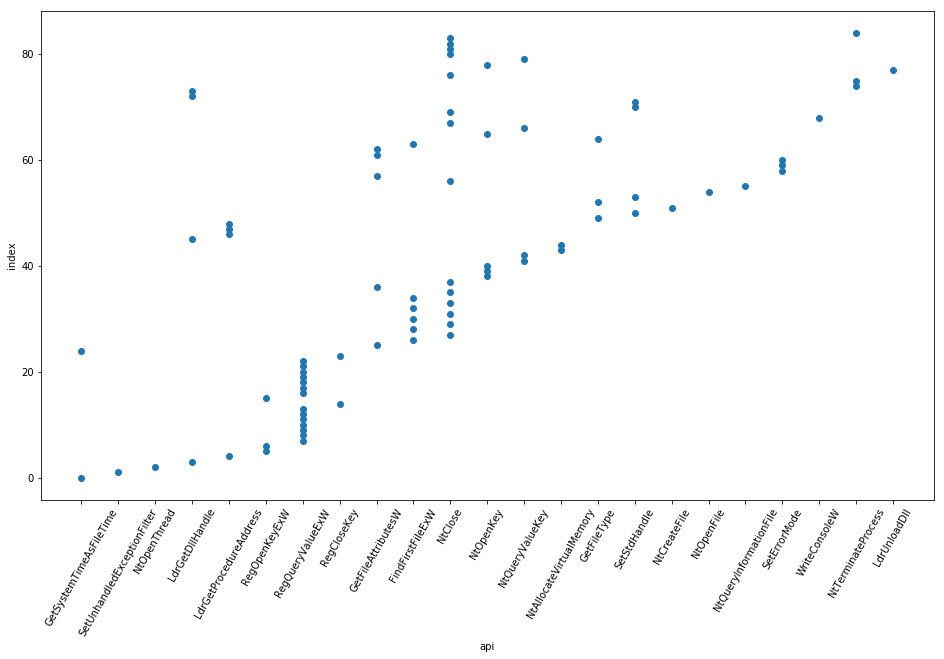

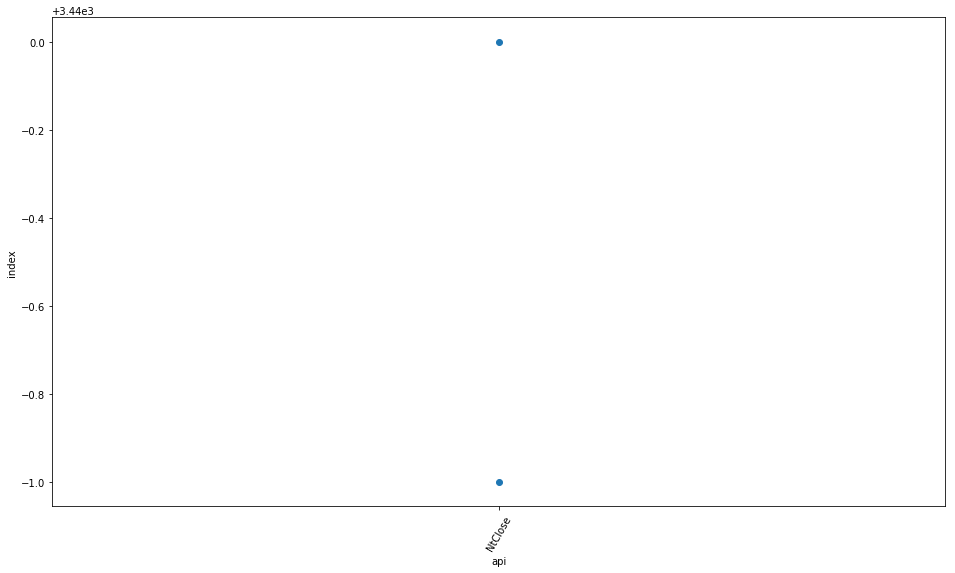

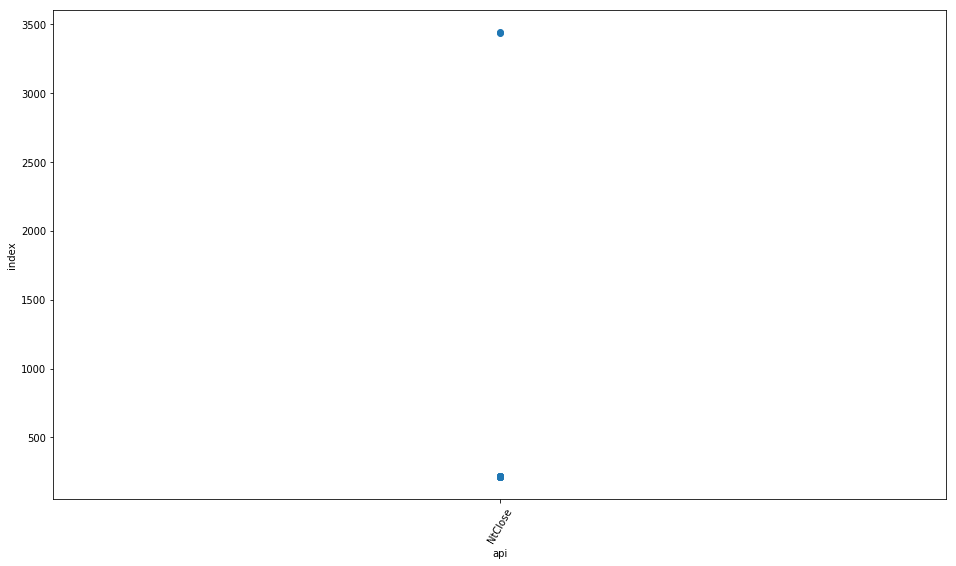

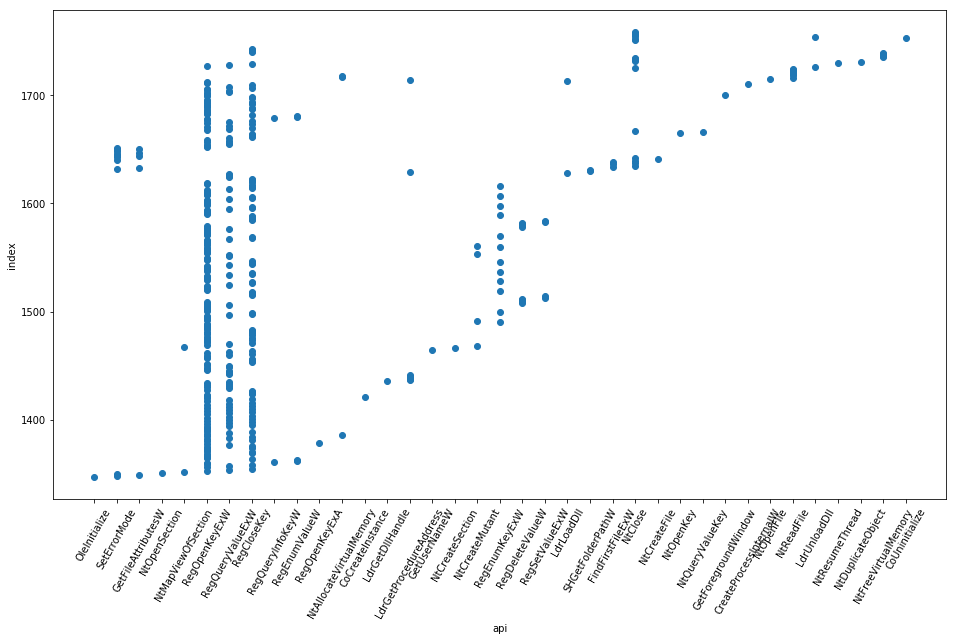

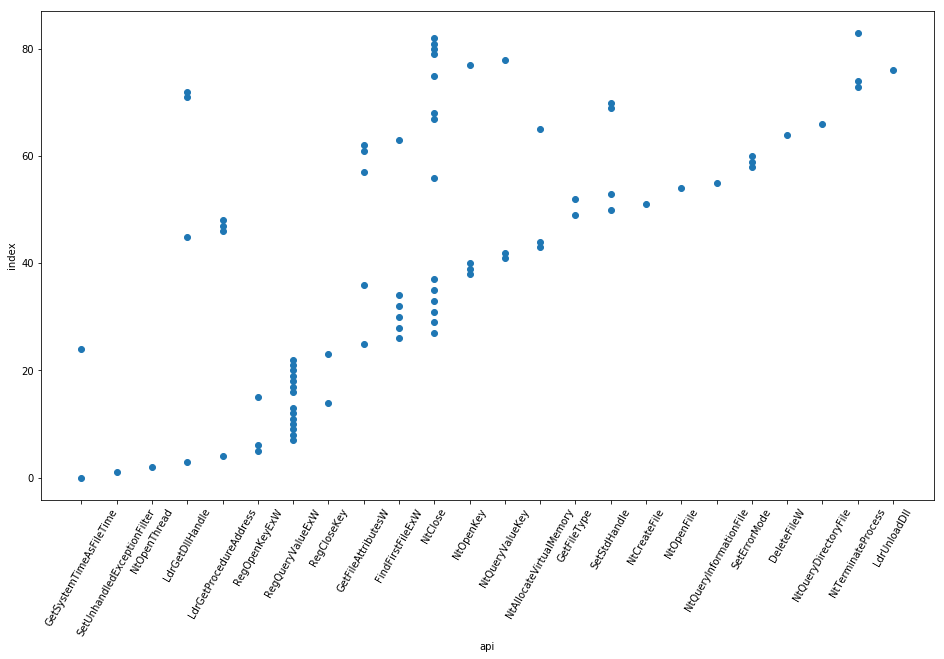

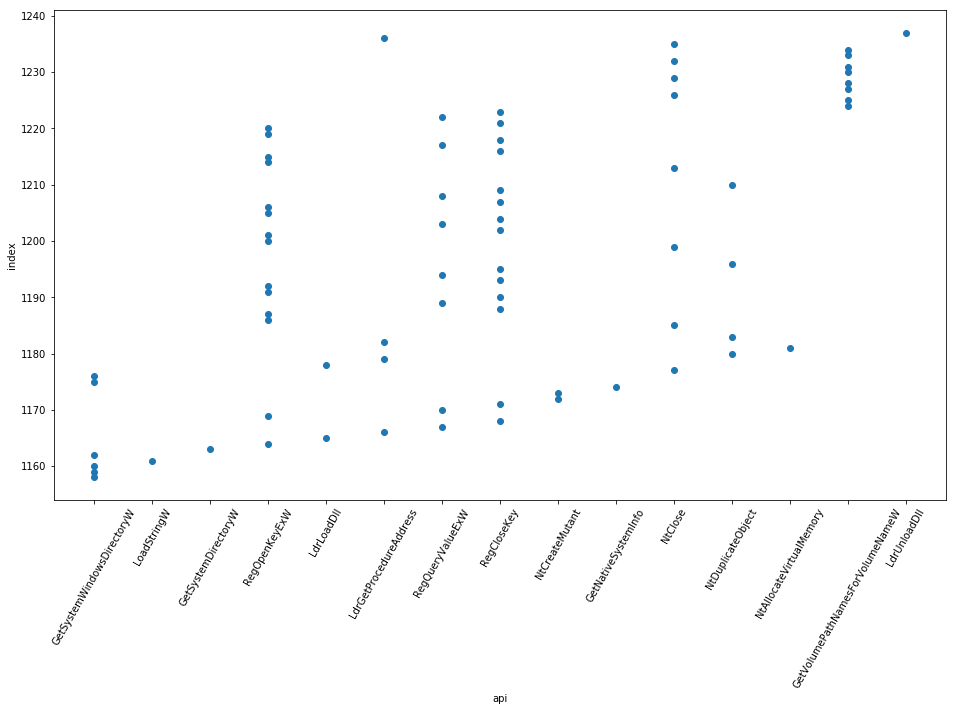

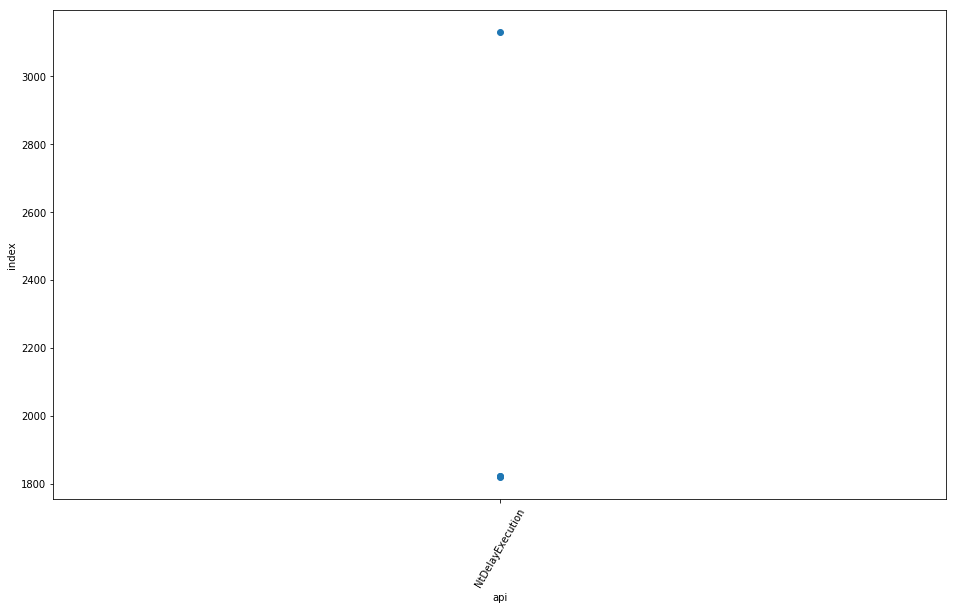

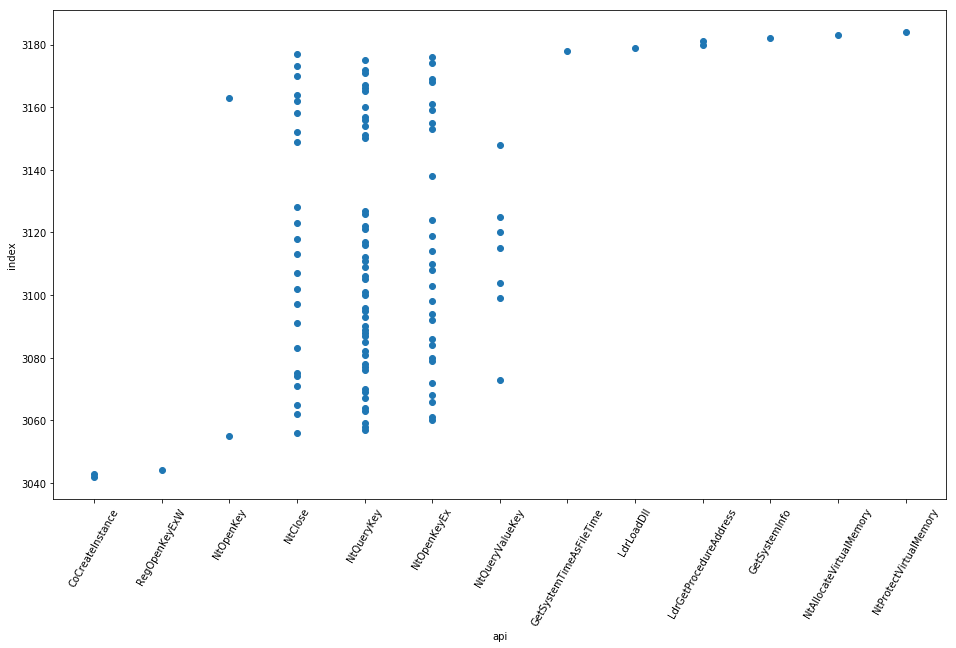

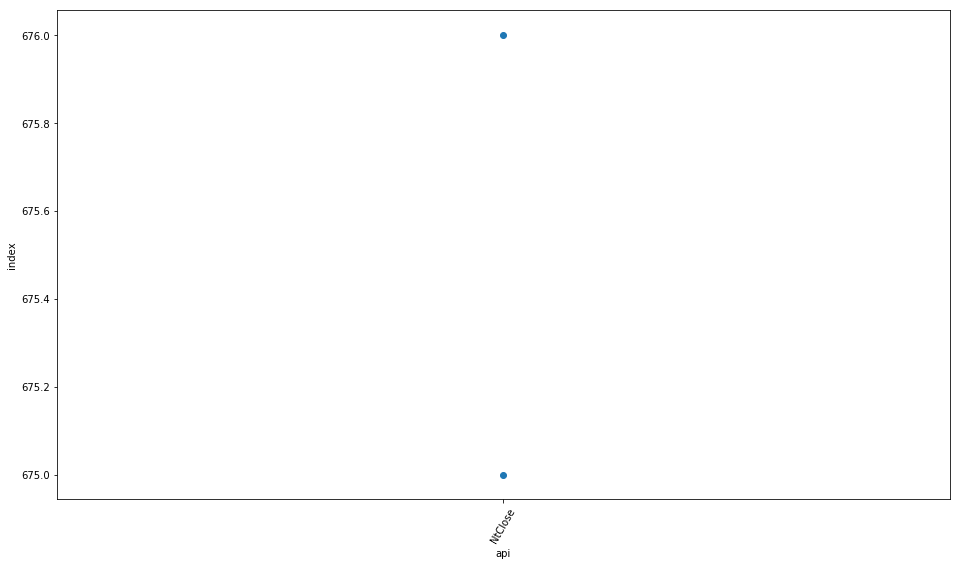

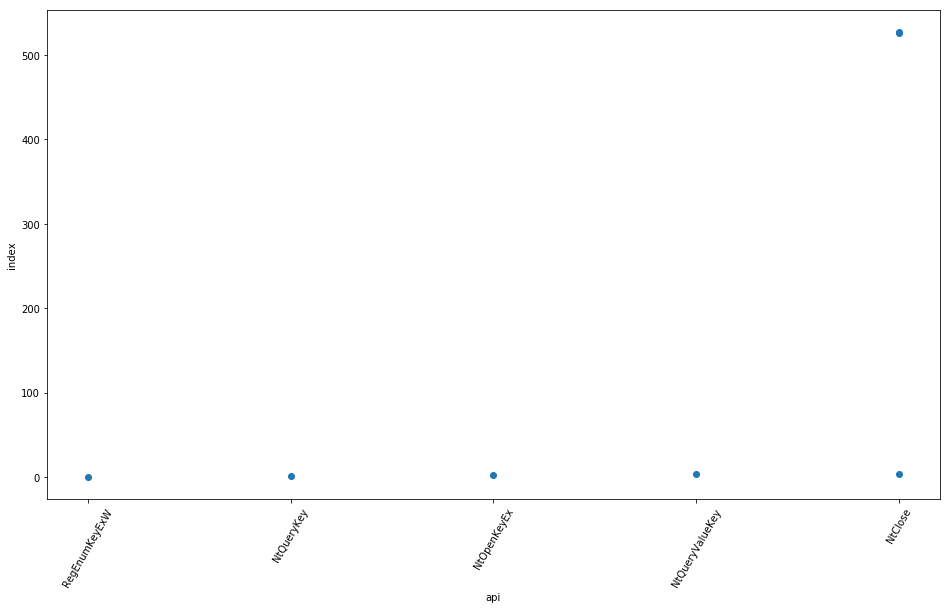

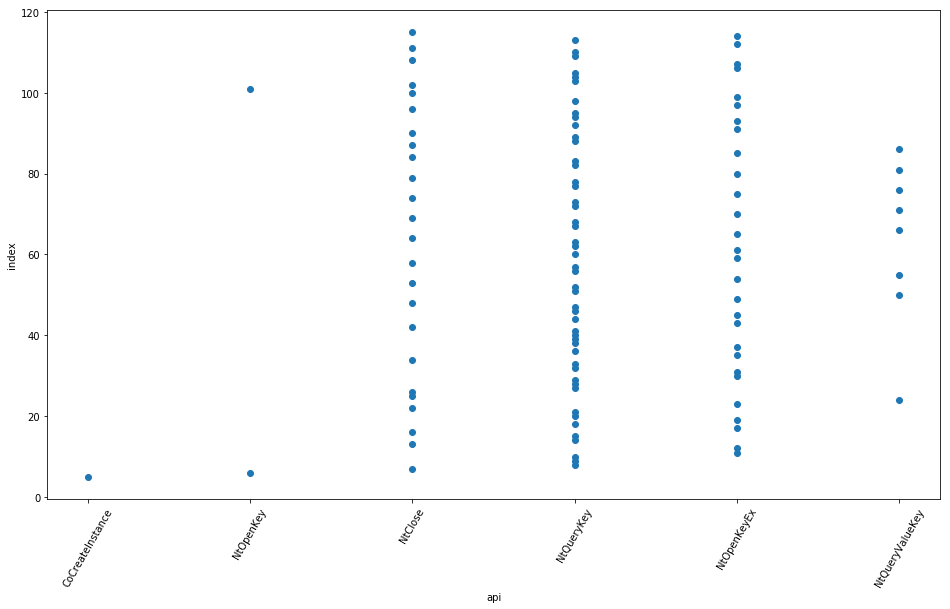

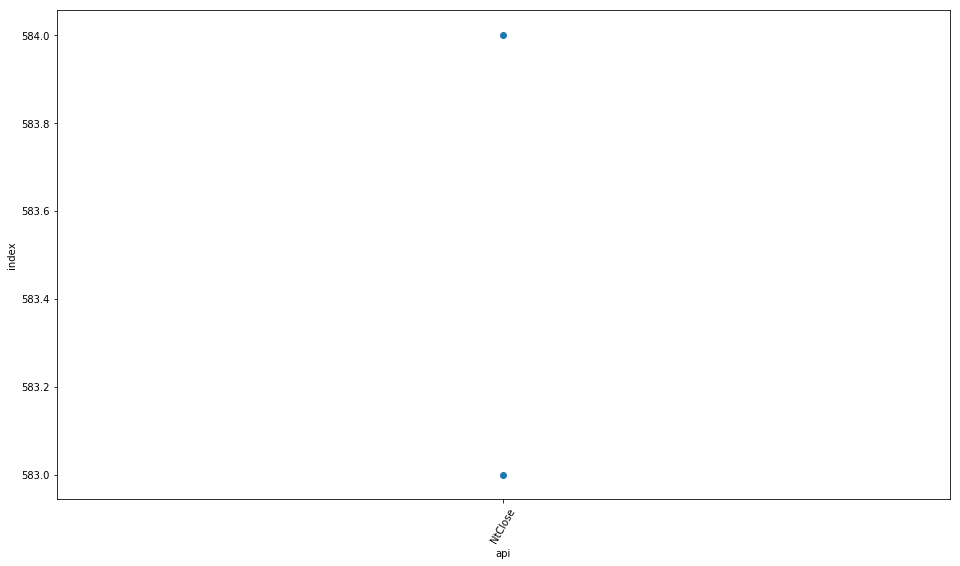

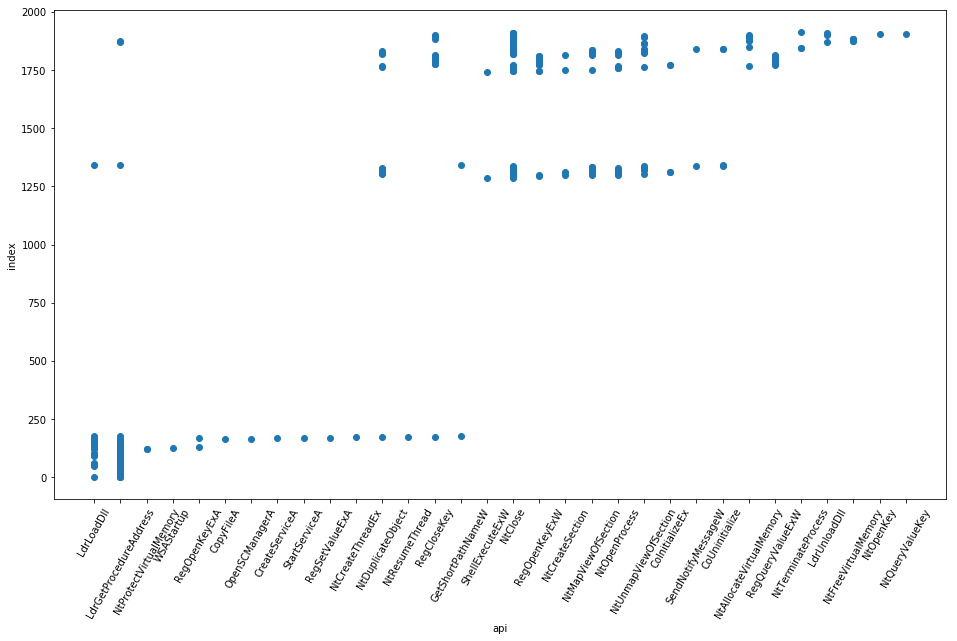

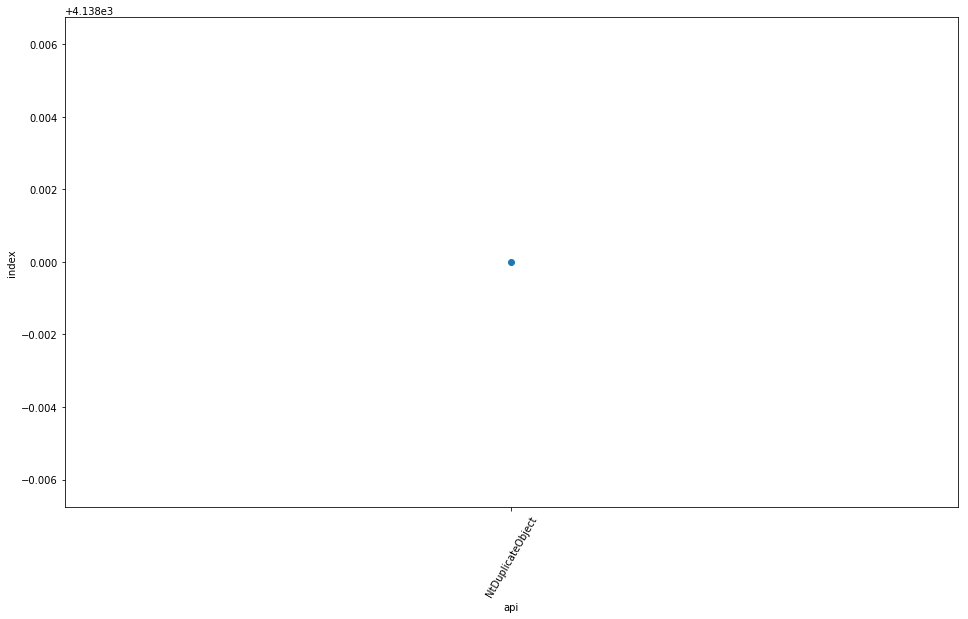

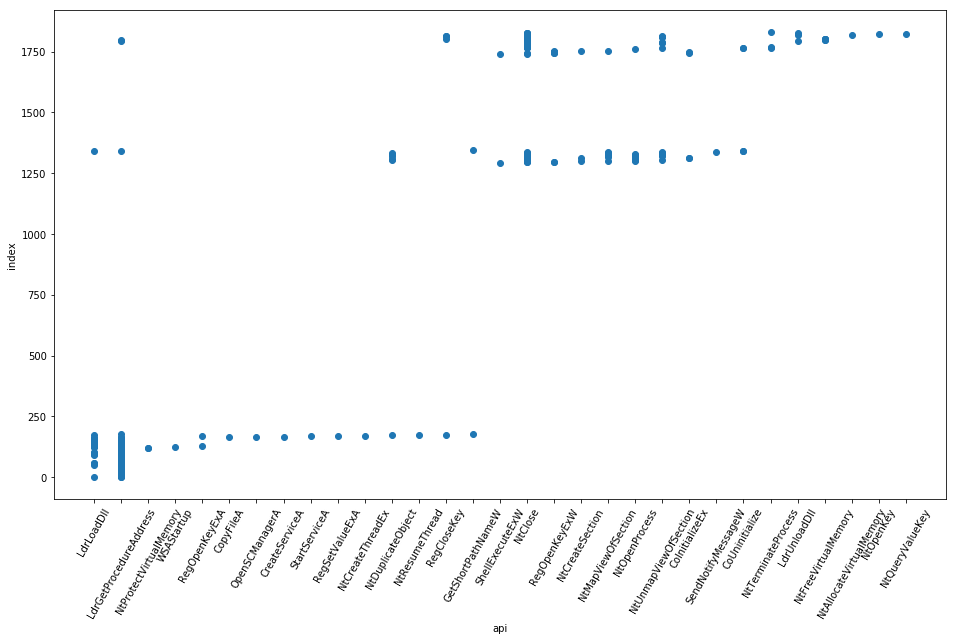

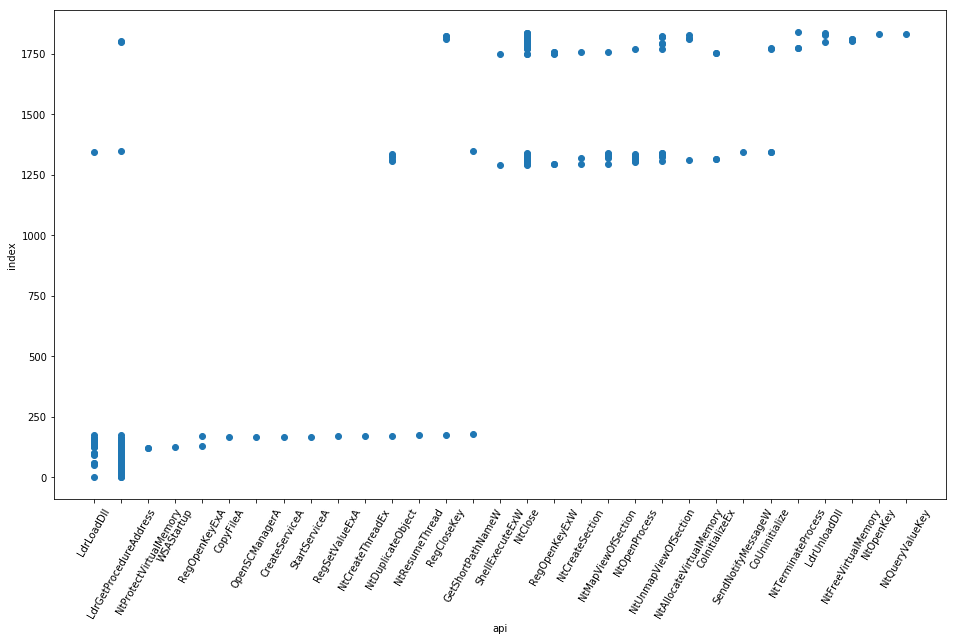

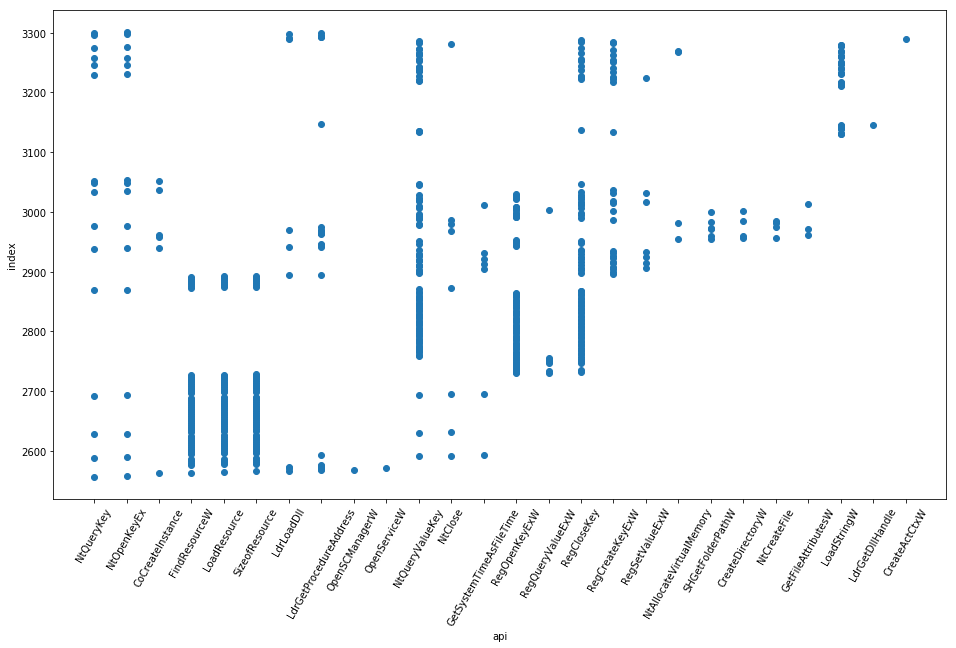

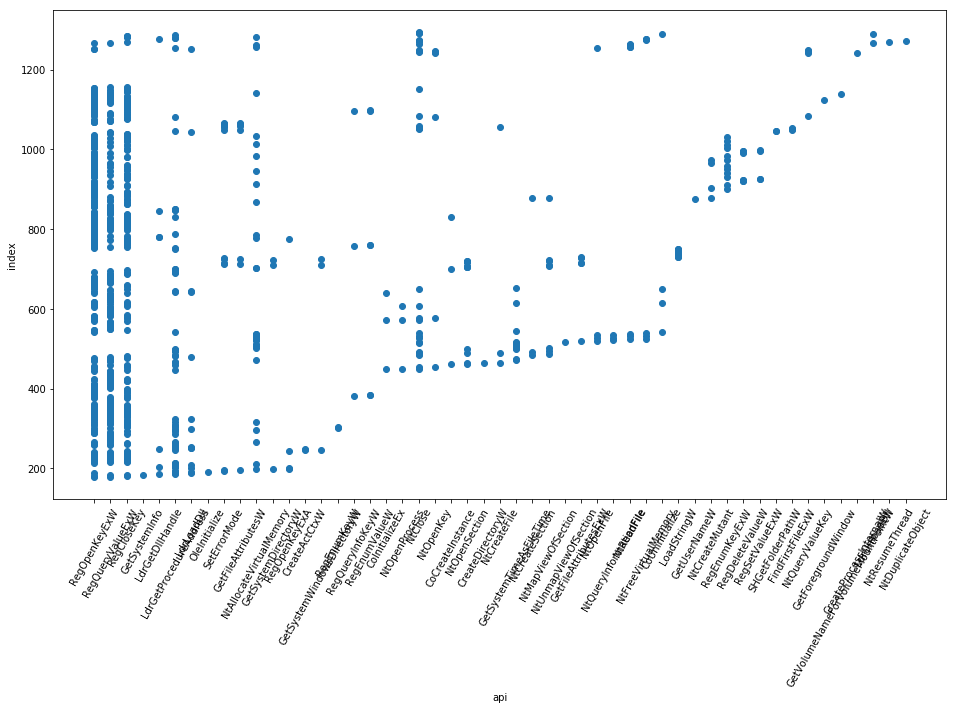

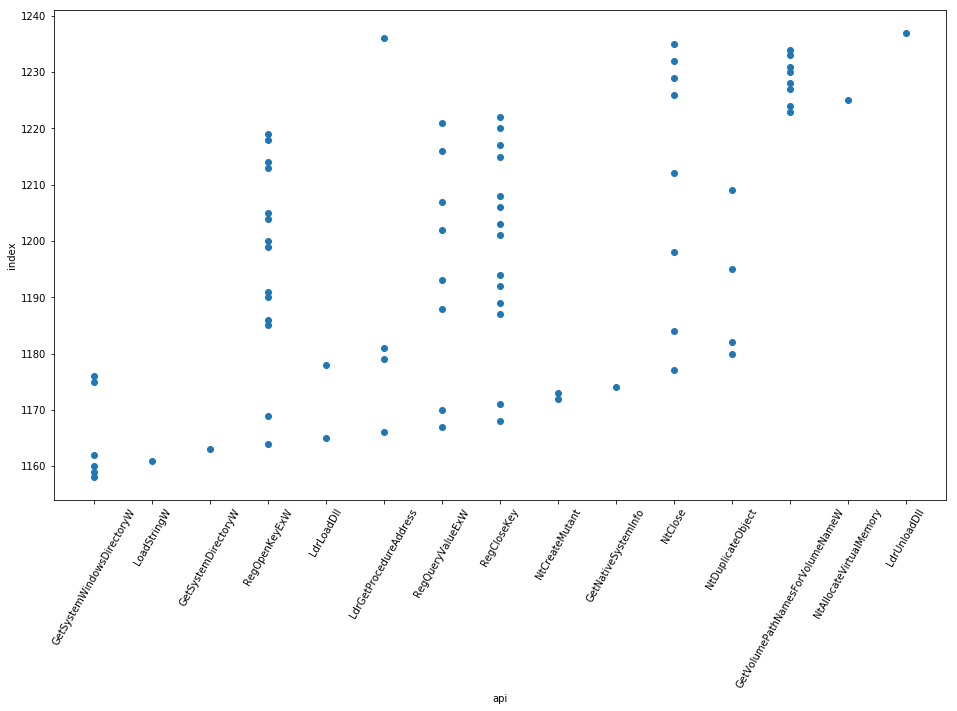

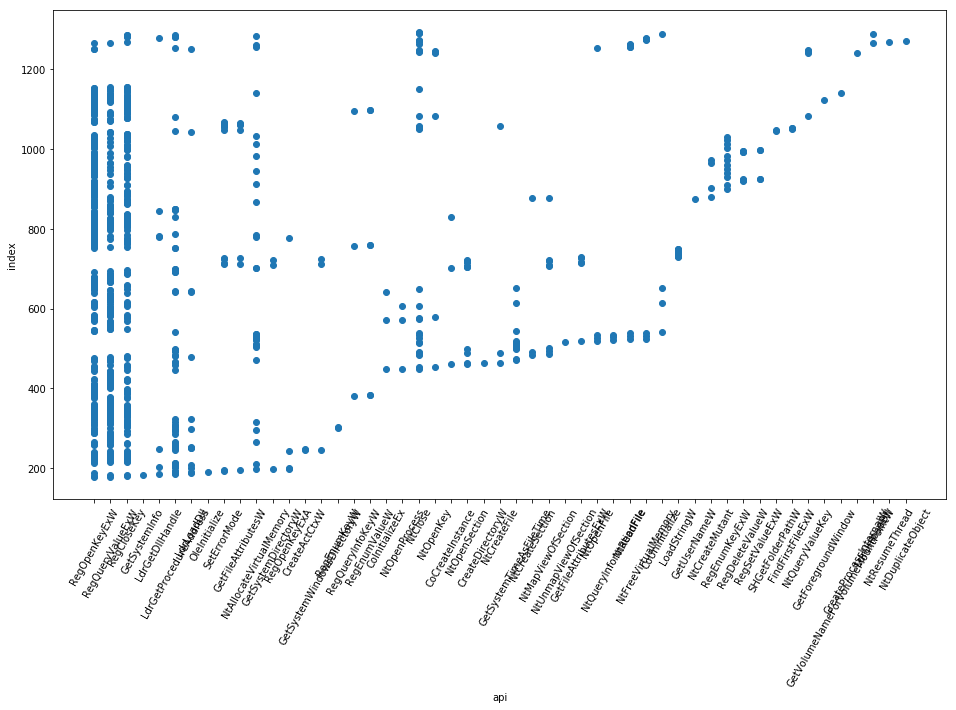

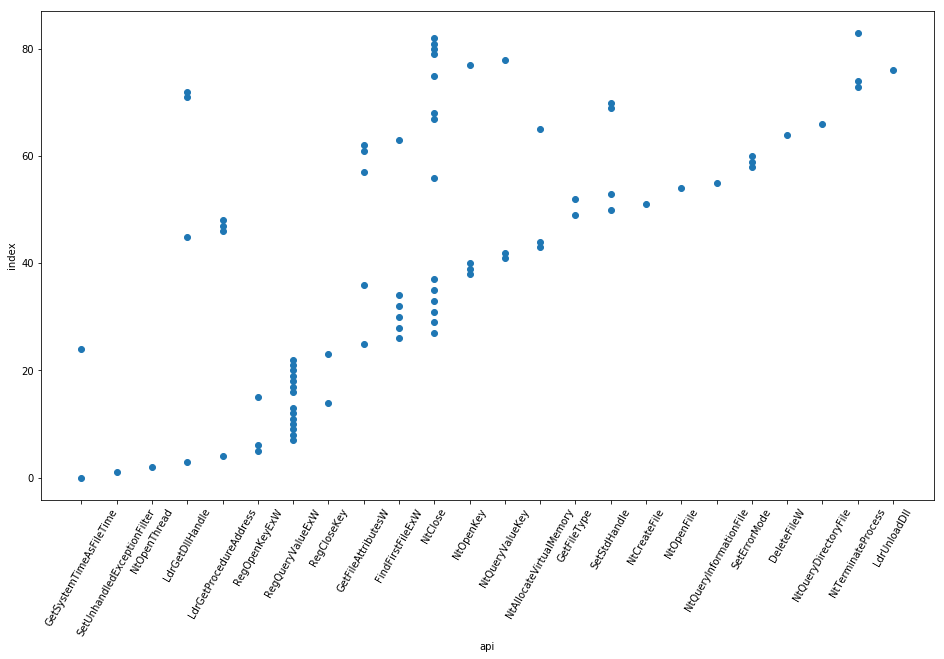

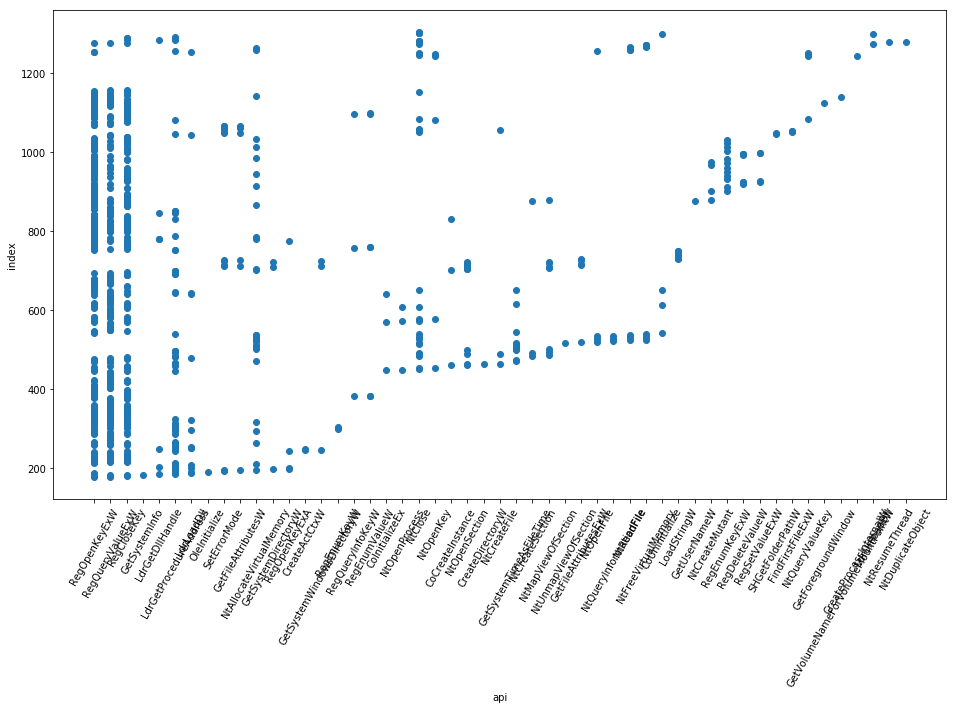

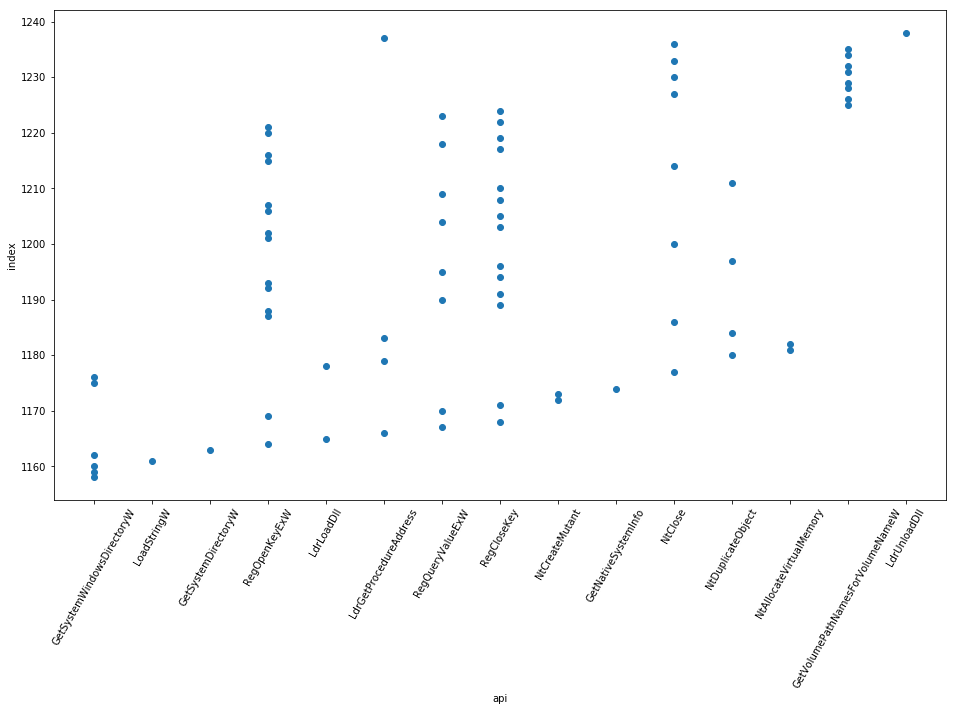

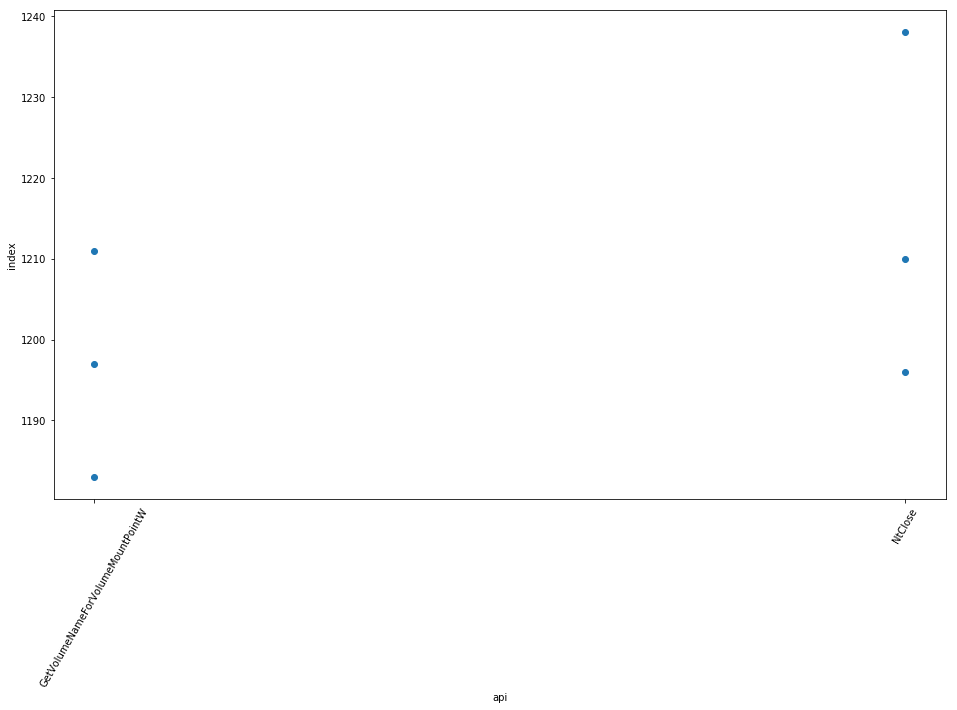

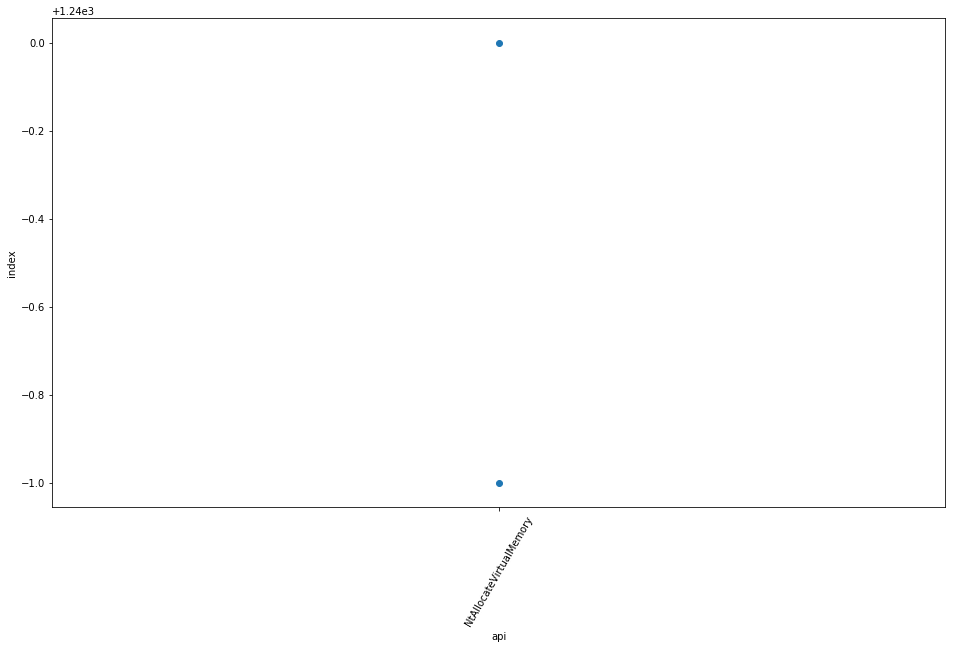

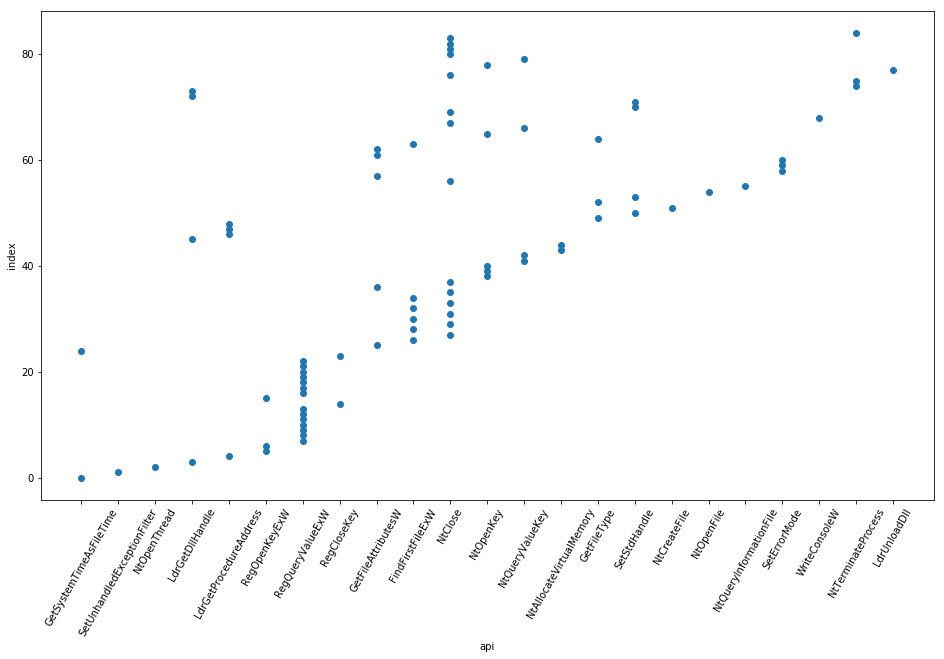

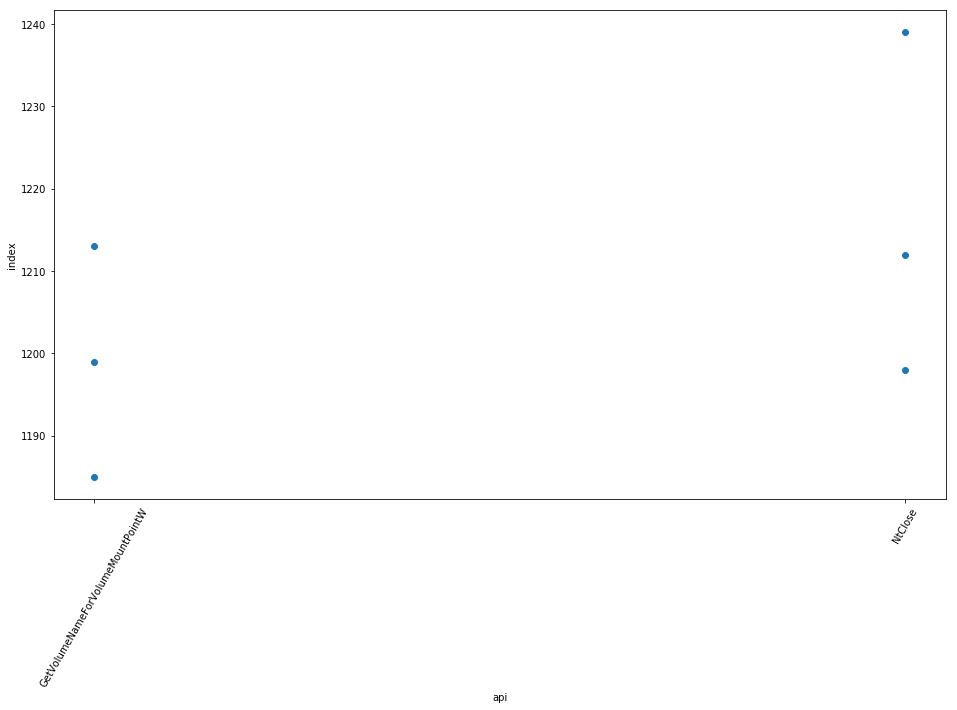

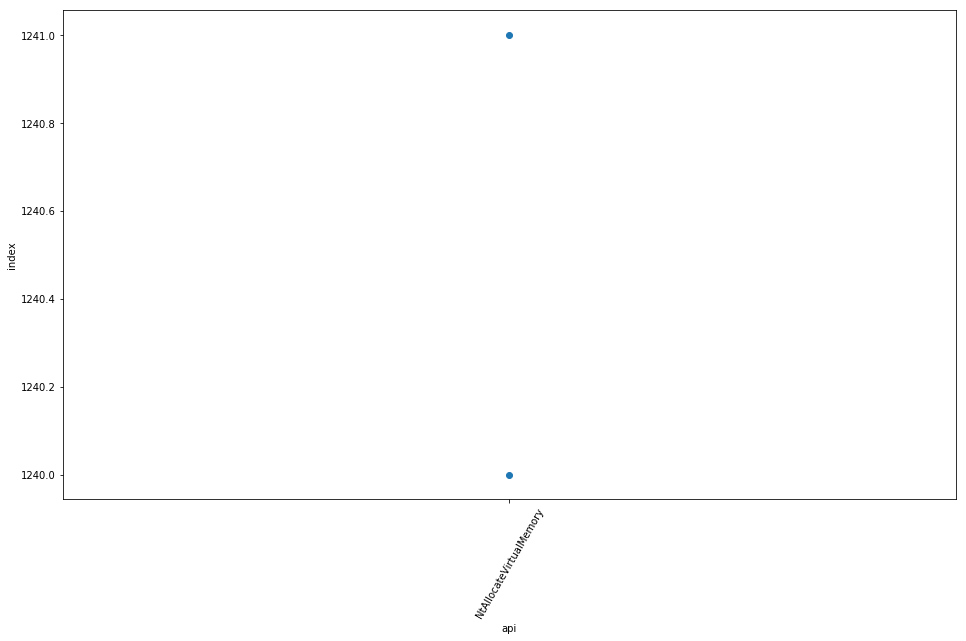

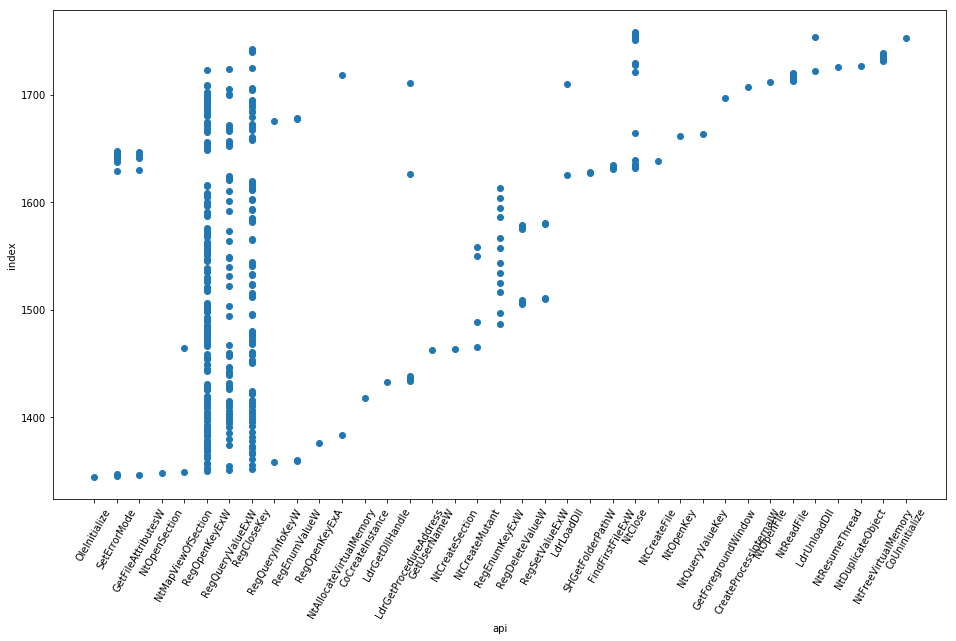

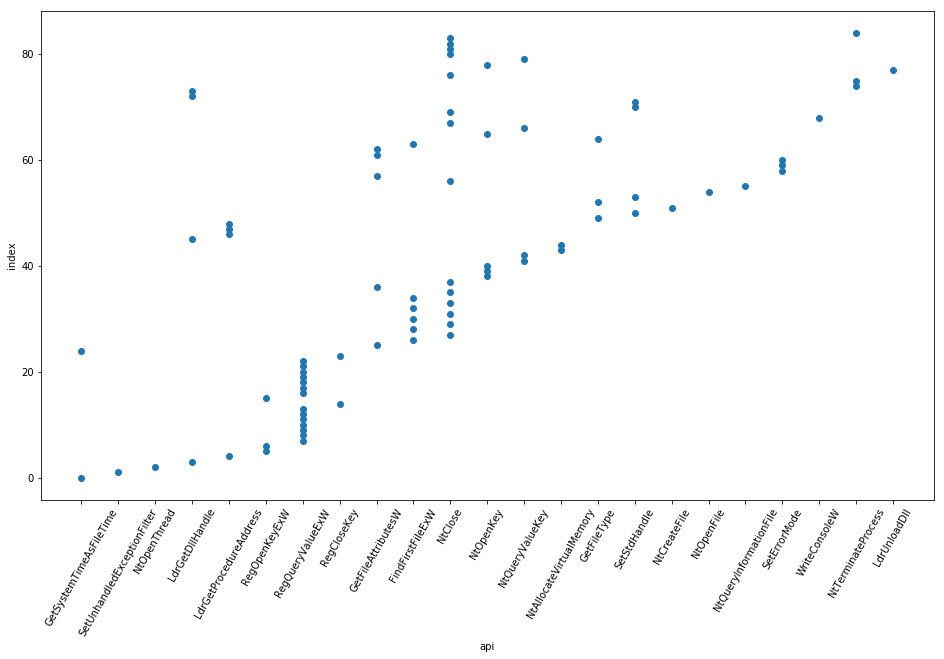

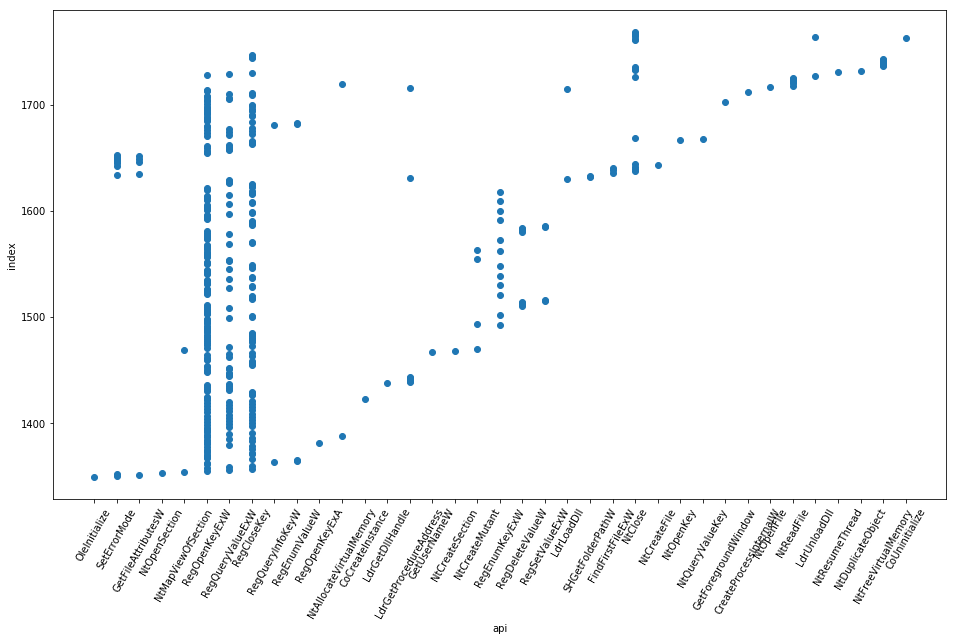

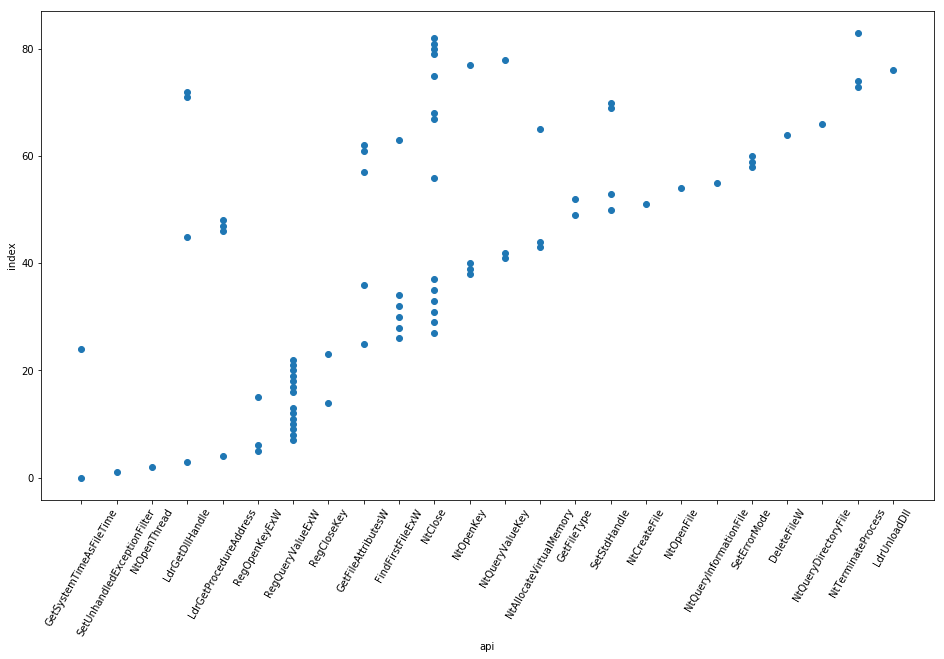

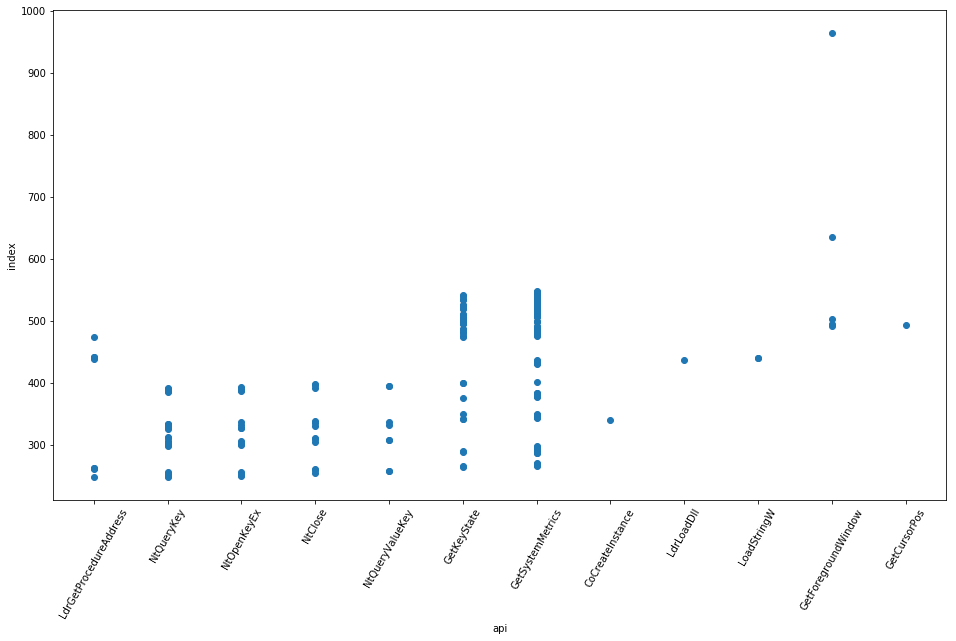

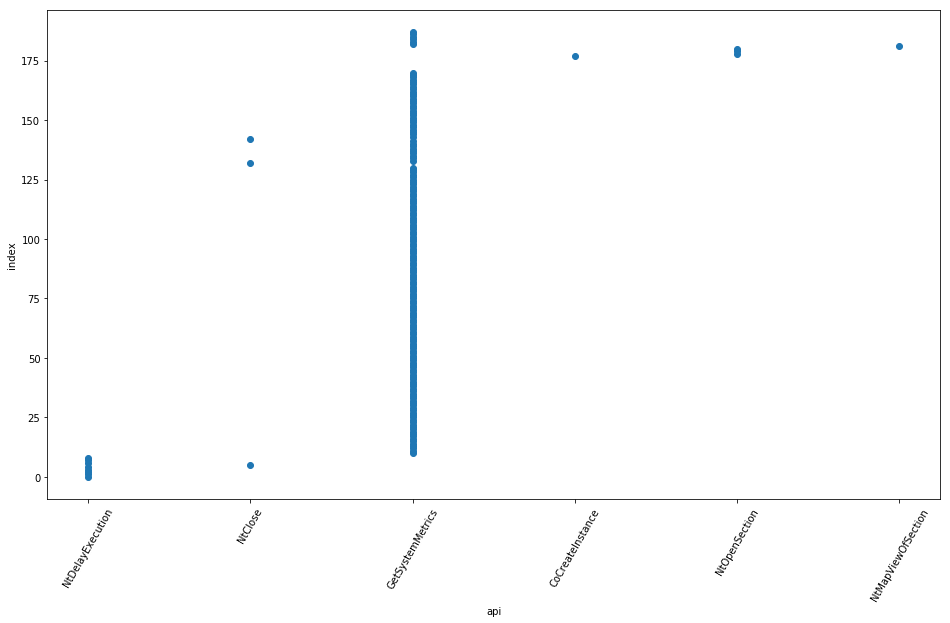

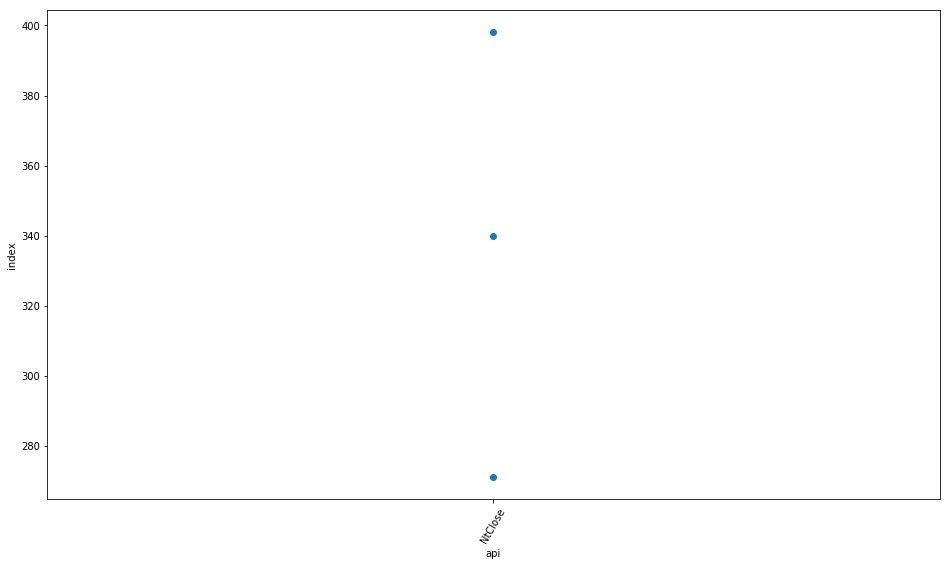

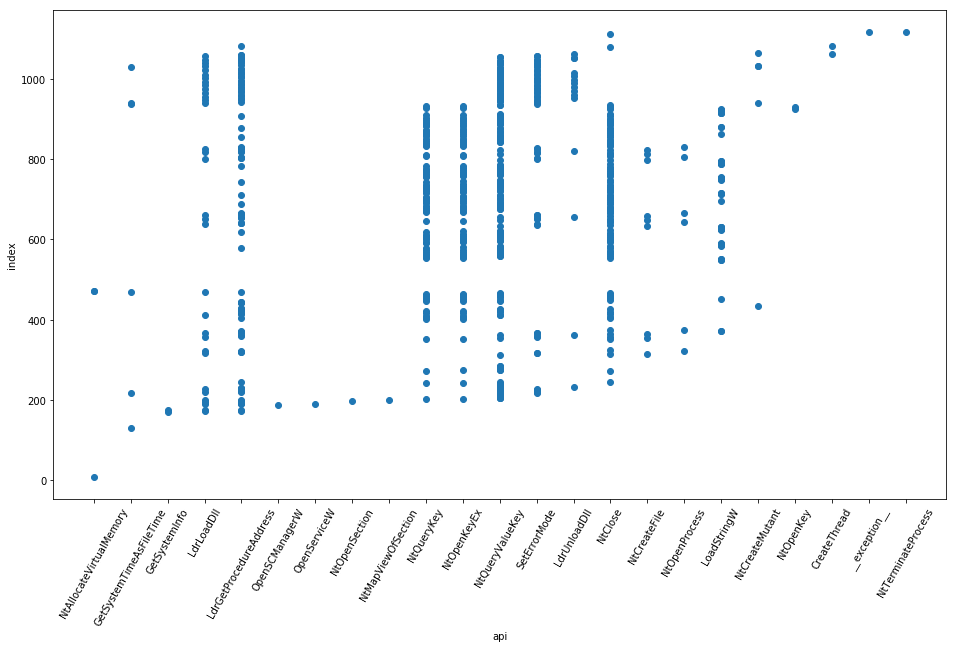

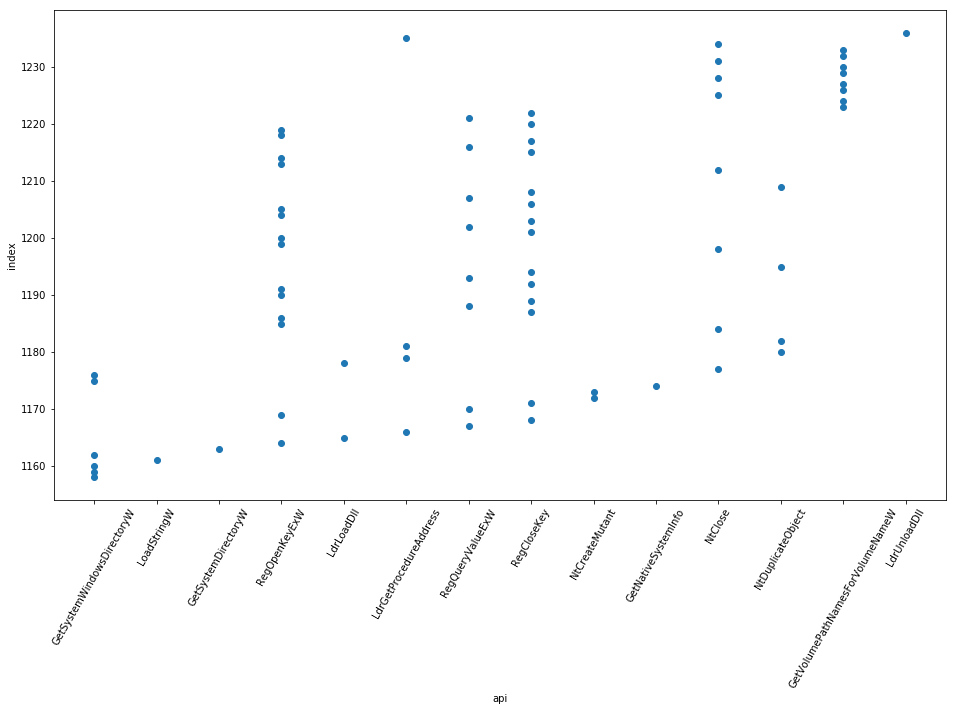

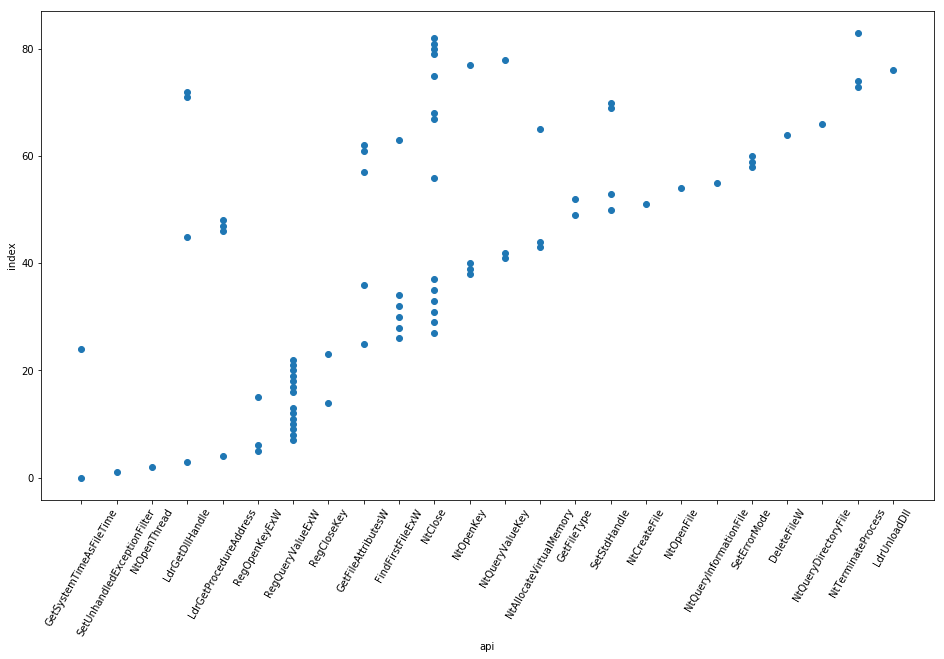

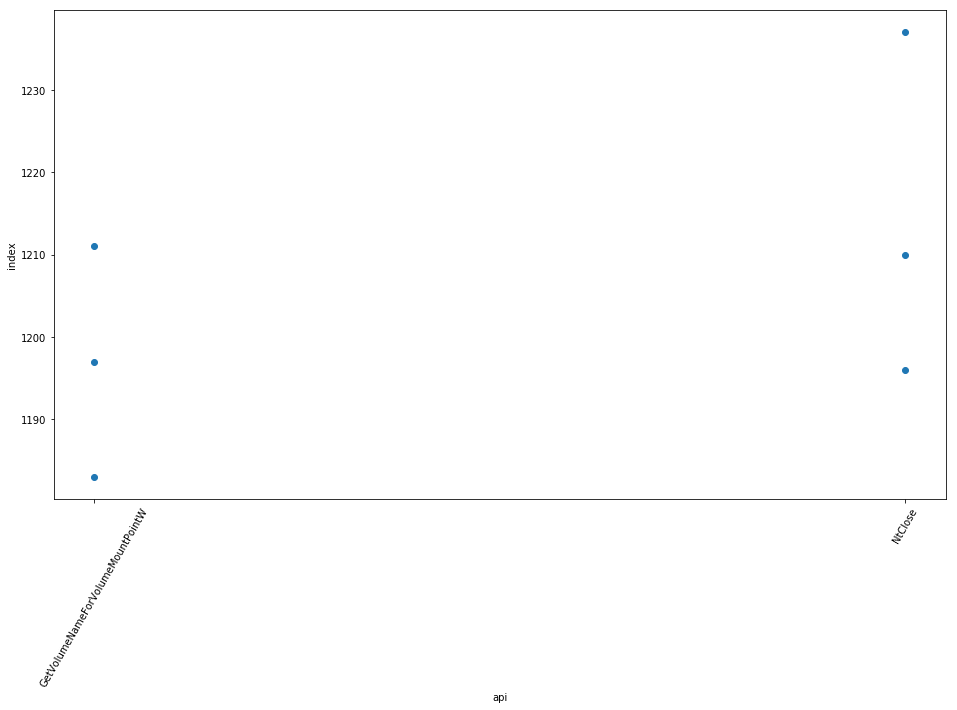

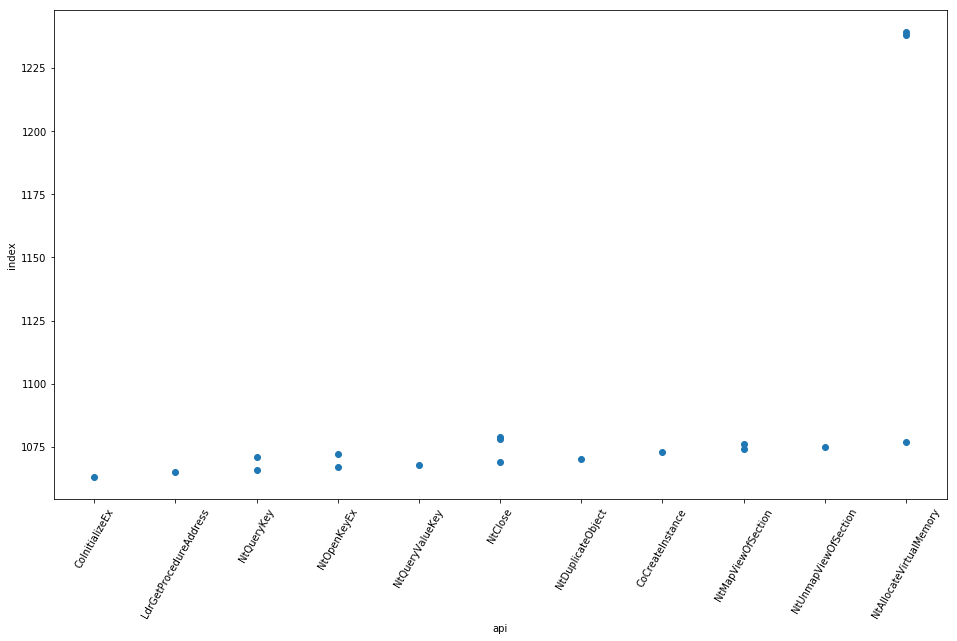

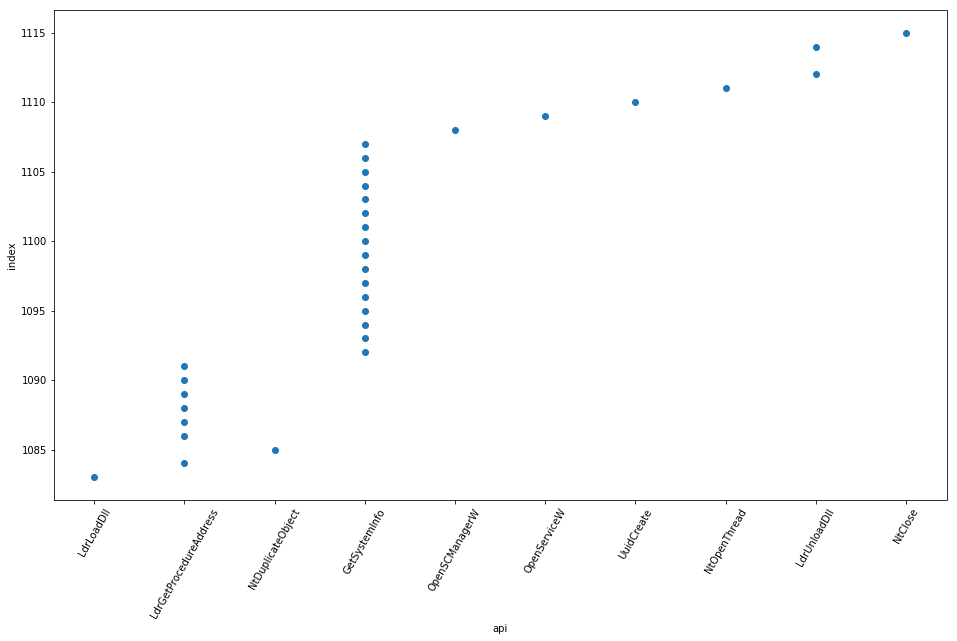

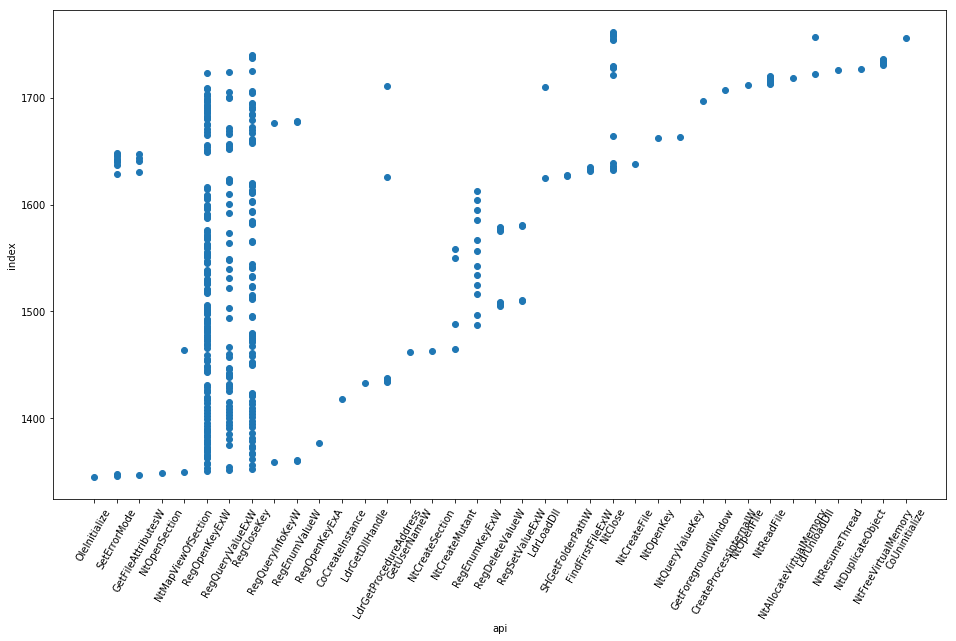

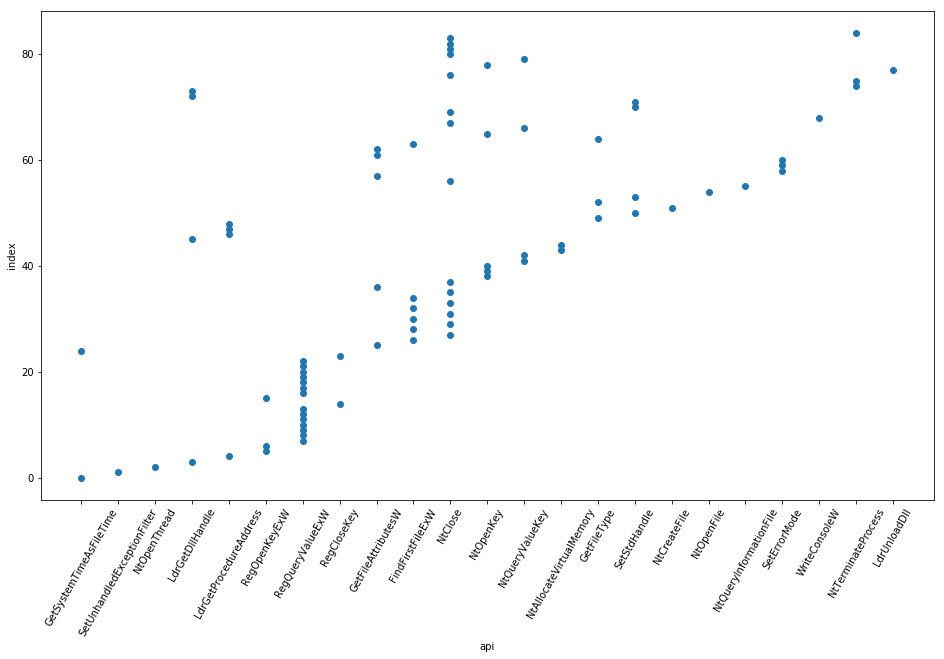

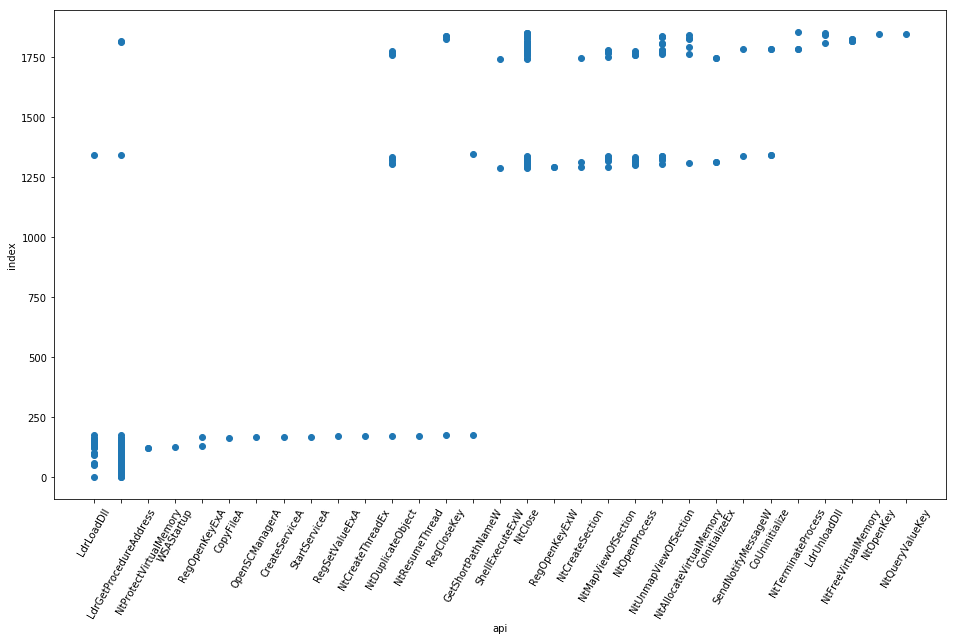

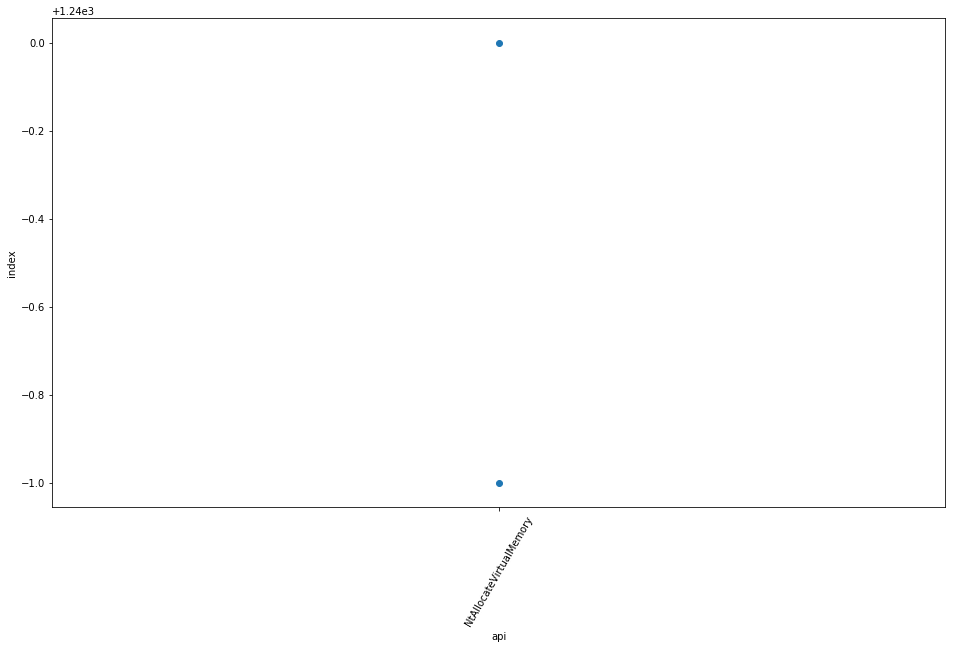

In [61]:
file_2=data_df3[data_df3['file_id']==66389]
#print(file_2)
tid=file_2.groupby('tid')['index','api']
for i,j in tid:
    plt.figure(figsize=(16,9))
    plt.scatter((j['api'].values),j['index'])
    plt.xticks(rotation=60)
    plt.yticks(rotation=360)
    plt.xlabel('api',fontsize=10)
    plt.ylabel('index',fontsize=10)
    plt.show()

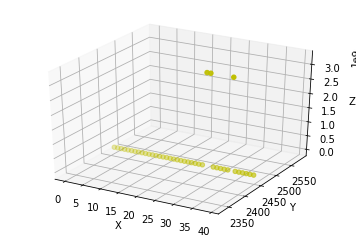

In [62]:
import numpy as np
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D 
data =np.array(data_df3[data_df3['file_id']==108214][['index','tid','return_value']])
x, y, z = data[:,0], data[:,1], data[:,2] 

ax = plt.subplot(111, projection='3d') # 创建一个三维的绘图工程 #  将数据点分成三部分画，在颜色上有区分度 
ax.scatter(x, y, z, c='y') # 绘制数据点 
#ax.scatter(x[10:20], y[10:20], z[10:20], c='r') 
#ax.scatter(x[30:40], y[30:40], z[30:40], c='g') 
ax.set_zlabel('Z') # 坐标轴 
ax.set_ylabel('Y') 
ax.set_xlabel('X') 
plt.show()


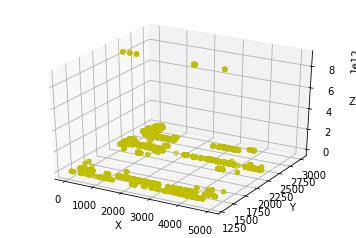

In [63]:
import numpy as np
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D 
data =np.array(data_df3[data_df3['file_id']==66040][['index','tid','return_value']])
x, y, z = data[:,0], data[:,1], data[:,2] 

ax = plt.subplot(111, projection='3d') # 创建一个三维的绘图工程 #  将数据点分成三部分画，在颜色上有区分度 
ax.scatter(x, y, z, c='y') # 绘制数据点 
#ax.scatter(x[10:20], y[10:20], z[10:20], c='r') 
#ax.scatter(x[30:40], y[30:40], z[30:40], c='g') 
ax.set_zlabel('Z') # 坐标轴 
ax.set_ylabel('Y') 
ax.set_xlabel('X') 
plt.show()


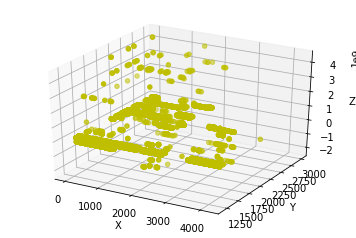

In [64]:
import numpy as np
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D 
data =np.array(data_df3[data_df3['file_id']==66389][['index','tid','return_value']])
x, y, z = data[:,0], data[:,1], data[:,2] 

ax = plt.subplot(111, projection='3d') # 创建一个三维的绘图工程 #  将数据点分成三部分画，在颜色上有区分度 
ax.scatter(x, y, z, c='y') # 绘制数据点 
#ax.scatter(x[10:20], y[10:20], z[10:20], c='r') 
#ax.scatter(x[30:40], y[30:40], z[30:40], c='g') 
ax.set_zlabel('Z') # 坐标轴 
ax.set_ylabel('Y') 
ax.set_xlabel('X') 
plt.show()


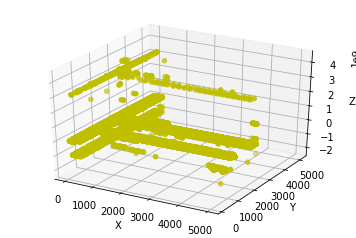

In [65]:
import numpy as np
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D 
data =np.array(data_df3[data_df3['file_id']==53896][['index','tid','return_value']])
x, y, z = data[:,0], data[:,1], data[:,2] 

ax = plt.subplot(111, projection='3d') # 创建一个三维的绘图工程 #  将数据点分成三部分画，在颜色上有区分度 
ax.scatter(x, y, z, c='y') # 绘制数据点 
#ax.scatter(x[10:20], y[10:20], z[10:20], c='r') 
#ax.scatter(x[30:40], y[30:40], z[30:40], c='g') 
ax.set_zlabel('Z') # 坐标轴 
ax.set_ylabel('Y') 
ax.set_xlabel('X') 
plt.show()
